<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Loading-and-preparing-data" data-toc-modified-id="Loading-and-preparing-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loading and preparing data</a></span></li><li><span><a href="#Intraclass-correlations" data-toc-modified-id="Intraclass-correlations-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Intraclass correlations</a></span><ul class="toc-item"><li><span><a href="#Original-study,-blind-group-intraclass-correlation" data-toc-modified-id="Original-study,-blind-group-intraclass-correlation-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Original study, blind group intraclass correlation</a></span></li><li><span><a href="#Original-study,-sighted-group-intraclass-correlation" data-toc-modified-id="Original-study,-sighted-group-intraclass-correlation-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Original study, sighted group intraclass correlation</a></span></li><li><span><a href="#2nd-Replication-study,-intraclass-correlation-(all-sighted-participants)" data-toc-modified-id="2nd-Replication-study,-intraclass-correlation-(all-sighted-participants)-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>2nd Replication study, intraclass correlation (all sighted participants)</a></span></li><li><span><a href="#ICC-in-low-versus-high-reading-groups" data-toc-modified-id="ICC-in-low-versus-high-reading-groups-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>ICC in low versus high reading groups</a></span><ul class="toc-item"><li><span><a href="#Median-split-based-on-ART" data-toc-modified-id="Median-split-based-on-ART-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Median split based on ART</a></span></li></ul></li><li><span><a href="#Median-split-based-on-reading-motivation-score" data-toc-modified-id="Median-split-based-on-reading-motivation-score-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Median split based on reading motivation score</a></span></li></ul></li><li><span><a href="#Interaction-between-reading-and-predictiveness-of-COCA-fiction-semantic-projections" data-toc-modified-id="Interaction-between-reading-and-predictiveness-of-COCA-fiction-semantic-projections-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Interaction between reading and predictiveness of COCA-fiction semantic projections</a></span><ul class="toc-item"><li><span><a href="#ART" data-toc-modified-id="ART-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>ART</a></span></li><li><span><a href="#Fiction" data-toc-modified-id="Fiction-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Fiction</a></span></li><li><span><a href="#Nonfiction" data-toc-modified-id="Nonfiction-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Nonfiction</a></span></li><li><span><a href="#Reading-subscales" data-toc-modified-id="Reading-subscales-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Reading subscales</a></span><ul class="toc-item"><li><span><a href="#Reading-motivation" data-toc-modified-id="Reading-motivation-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Reading motivation</a></span></li><li><span><a href="#Reading-as-part-of-self" data-toc-modified-id="Reading-as-part-of-self-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>Reading as part of self</a></span></li><li><span><a href="#Reading-efficacy" data-toc-modified-id="Reading-efficacy-3.4.3"><span class="toc-item-num">3.4.3&nbsp;&nbsp;</span>Reading efficacy</a></span></li><li><span><a href="#Reading-for-recognition" data-toc-modified-id="Reading-for-recognition-3.4.4"><span class="toc-item-num">3.4.4&nbsp;&nbsp;</span>Reading for recognition</a></span></li><li><span><a href="#Reading-to-do-well-in-other-realms" data-toc-modified-id="Reading-to-do-well-in-other-realms-3.4.5"><span class="toc-item-num">3.4.5&nbsp;&nbsp;</span>Reading to do well in other realms</a></span></li></ul></li></ul></li><li><span><a href="#Convert-notebook-to-html" data-toc-modified-id="Convert-notebook-to-html-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Convert notebook to html</a></span></li></ul></div>

In [29]:
%matplotlib inline
from IPython.display import display, display_markdown

import subprocess as sp
import numpy as np
import pandas as pd
import pingouin as pg
import seaborn as sns
import pymc3 as pm
import arviz as az
import bambi
import copy
import random

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['figure.dpi'] = 300

from subs2vec.utensils import log_timer
from subs2vec.vecs import Vectors
from subs2vec.neighbors import compute_nn

def display_md(md, **kwargs):
    return display_markdown(md, raw=True, **kwargs)

def convert_notebook(title, output='html'):
    convert = sp.run(f'jupyter nbconvert {title}.ipynb --to {output} --output {title}.{output}'.split(' '))
    if convert.returncode == 0:
        display_md(f'Jupyter notebook `{title}` converted successfully.')
    else:
        display_md(f'Error: encountered problem converting Jupyter notebook `{title}`')

def download(fname):
    dl = sp.run(f'wget {fname}'.split(' '))
    if dl.returncode == 0:
        display_md(f'Download of `{fname}` succesful.')
    else:
        display_md(f'Download of `{fname}` failed.')
        
@log_timer
def filter_vecs(vecs, filter_words):
    filtered_vecs = copy.deepcopy(vecs)
    filtered_vecs.vectors = filtered_vecs.vectors[np.isin(filtered_vecs.words, filter_words)]
    filtered_vecs.words = filtered_vecs.words[np.isin(filtered_vecs.words, filter_words)]
    filtered_vecs.n = len(filtered_vecs.words)
    display_md(f'Filtered {vecs.n} vectors, {filtered_vecs.n} remaining.')
    return filtered_vecs

def norm(x):
    return x / np.linalg.norm(x, 2)

sns.set(style='whitegrid')
pd.options.mode.chained_assignment = None

params = {
    'init': 'advi+adapt_diag',
    'n_init': 10000,
    'chains': 2,
    'draws': 1000,
    'tune': 1000,
    #'target_accept': .9,
}

# Loading and preparing data

In [2]:
df_joint = pd.read_csv('data_plus_predictors.tsv', sep='\t', low_memory=False)
display(df_joint)

,index,group,dimension,pp_id,color,rating,experiment,self_vs_other,art,fiction,...,sighted,group_eff,group_z,original,replication_1,replication_2,other,self,self_vs_other_eff,self_vs_other_z
0,0,sighted,cold-hot,sighted_1,white,1,original,self,NaN,NaN,...,1,1.0,0.211241,1,0,0,0,1,-1.0,-0.891882
1,1,sighted,ripe-unripe,sighted_1,white,7,original,self,NaN,NaN,...,1,1.0,0.211241,1,0,0,0,1,-1.0,-0.891882
2,2,sighted,new-old,sighted_1,white,1,original,self,NaN,NaN,...,1,1.0,0.211241,1,0,0,0,1,-1.0,-0.891882
3,3,sighted,submissive-aggressive,sighted_1,white,1,original,self,NaN,NaN,...,1,1.0,0.211241,1,0,0,0,1,-1.0,-0.891882
4,4,sighted,selfless-jealous,sighted_1,white,1,original,self,NaN,NaN,...,1,1.0,0.211241,1,0,0,0,1,-1.0,-0.891882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42975,28507,sighted,light-heavy,sighted_68129,red,5,replication_2,other,11.0,0.0,...,1,1.0,0.211241,0,0,1,1,0,1.0,1.121199
42976,28508,sighted,relaxed-tense,sighted_68129,red,5,replication_2,other,11.0,0.0,...,1,1.0,0.211241,0,0,1,1,0,1.0,1.121199
42977,28509,sighted,alive-dead,sighted_68129,red,6,replication_2,other,11.0,0.0,...,1,1.0,0.211241,0,0,1,1,0,1.0,1.121199
42978,28510,sighted,fast-slow,sighted_68129,red,3,replication_2,other,11.0,0.0,...,1,1.0,0.211241,0,0,1,1,0,1.0,1.121199


# Intraclass correlations

In [3]:
# create item-level variable
df_joint['item'] = df_joint.apply(lambda x: x['color'] + '_' + x['dimension'], axis=1)

## Original study, blind group intraclass correlation

In [4]:
pg.intraclass_corr(df_joint[(df_joint['experiment'] == 'original') & (df_joint['group'] == 'blind')],
                   targets='item', raters='pp_id', ratings='rating').round(2)

,Type,Description,ICC,F,df1,df2,pval,CI95%
0,ICC1,Single raters absolute,0.35,7.47,152,1683,0.0,"[0.29, 0.42]"
1,ICC2,Single random raters,0.35,8.16,152,1672,0.0,"[0.29, 0.42]"
2,ICC3,Single fixed raters,0.37,8.16,152,1672,0.0,"[0.32, 0.44]"
3,ICC1k,Average raters absolute,0.87,7.47,152,1683,0.0,"[0.83, 0.9]"
4,ICC2k,Average random raters,0.87,8.16,152,1672,0.0,"[0.83, 0.9]"
5,ICC3k,Average fixed raters,0.88,8.16,152,1672,0.0,"[0.85, 0.9]"


## Original study, sighted group intraclass correlation

In [5]:
pg.intraclass_corr(df_joint[(df_joint['experiment'] == 'original') & (df_joint['group'] == 'sighted')],
                   targets='item', raters='pp_id', ratings='rating').round(2)

,Type,Description,ICC,F,df1,df2,pval,CI95%
0,ICC1,Single raters absolute,0.49,20.21,152,2907,0.0,"[0.43, 0.55]"
1,ICC2,Single random raters,0.49,20.37,152,2888,0.0,"[0.43, 0.55]"
2,ICC3,Single fixed raters,0.49,20.37,152,2888,0.0,"[0.43, 0.56]"
3,ICC1k,Average raters absolute,0.95,20.21,152,2907,0.0,"[0.94, 0.96]"
4,ICC2k,Average random raters,0.95,20.37,152,2888,0.0,"[0.94, 0.96]"
5,ICC3k,Average fixed raters,0.95,20.37,152,2888,0.0,"[0.94, 0.96]"


## 2nd Replication study, intraclass correlation (all sighted participants)

In [9]:
df_rep = df_joint[(df_joint['experiment'] == 'replication_2') & (df_joint['self_vs_other'] == 'self')]
pg.intraclass_corr(
    df_rep,
    targets='item', raters='pp_id', ratings='rating'
).round(2)

,Type,Description,ICC,F,df1,df2,pval,CI95%
0,ICC1,Single raters absolute,0.27,34.14,161,14094,0.0,"[0.23, 0.32]"
1,ICC2,Single random raters,0.27,35.63,161,14007,0.0,"[0.23, 0.32]"
2,ICC3,Single fixed raters,0.28,35.63,161,14007,0.0,"[0.24, 0.33]"
3,ICC1k,Average raters absolute,0.97,34.14,161,14094,0.0,"[0.96, 0.98]"
4,ICC2k,Average random raters,0.97,35.63,161,14007,0.0,"[0.96, 0.98]"
5,ICC3k,Average fixed raters,0.97,35.63,161,14007,0.0,"[0.97, 0.98]"


The replication group does not include the 1st round (of about 30 participants) because the data for those participants were unbalanced and this ICC algorithm does not play nice with unbalanced data. No matter though, there are about 100 participants in the 2nd round of the replication study, which is enough for estimating the ICC.

Overall, it appears that:
1. ICC between participants was lower in the blind group (.35) than in the sighted group (.49) in the original experiment, but both groups had higher between participants ICC than (sighted) replication group (.28). This doesn't really tell us anything about blind versus sighted participants.
2. ICC to the mean was lower in the blind group than in both the sighted groups (original and replication) but since we know that means are more stable in larger groups, it follows that the larger the group, the higher the ICC to the mean.

To address the second point, we can draw a smaller sample from the replication data to see if this yields ICCs more similar to the ICCs for the blind participants.

In [10]:
# draw a random sample from the replication dataset
random_pps = random.sample(list(df_rep['pp_id']), 12)
pg.intraclass_corr(
    df_rep[df_rep['pp_id'].isin(random_pps)],
    targets='item', raters='pp_id', ratings='rating'
).round(2)

,Type,Description,ICC,F,df1,df2,pval,CI95%
0,ICC1,Single raters absolute,0.35,7.01,161,1620,0.0,"[0.3, 0.42]"
1,ICC2,Single random raters,0.35,7.21,161,1610,0.0,"[0.3, 0.42]"
2,ICC3,Single fixed raters,0.36,7.21,161,1610,0.0,"[0.3, 0.43]"
3,ICC1k,Average raters absolute,0.86,7.01,161,1620,0.0,"[0.82, 0.89]"
4,ICC2k,Average random raters,0.86,7.21,161,1610,0.0,"[0.82, 0.89]"
5,ICC3k,Average fixed raters,0.86,7.21,161,1610,0.0,"[0.83, 0.89]"


If we draw a random sample from the replication data with the same number of participants as the blind participants in the original data, we get very similar ICCs to the blind group. This means that a) the variability in the blind group doesn't seem to be out of the ordinary, and b) given the need to resort to subsampling, ICC is perhaps not the ideal tool for examining differences between these groups.

## ICC in low versus high reading groups
One last thing we can check is whether participants that read a lot are more similar to each other (more semantically aligned) than participants that do not read very much.

In [14]:
df_rep['art_high'] = df_rep['art'] >= df_rep['art'].median()
df_rep['reading_motivation_high'] = df_rep['reading_motivation'] >= df_rep['reading_motivation'].median()

### Median split based on ART

In [15]:
# low ART group
pg.intraclass_corr(
    df_rep[df_rep['art_high'] == False],
    targets='item', raters='pp_id', ratings='rating'
).round(2)

,Type,Description,ICC,F,df1,df2,pval,CI95%
0,ICC1,Single raters absolute,0.23,14.46,161,6966,0.0,"[0.2, 0.28]"
1,ICC2,Single random raters,0.23,15.28,161,6923,0.0,"[0.2, 0.28]"
2,ICC3,Single fixed raters,0.24,15.28,161,6923,0.0,"[0.21, 0.29]"
3,ICC1k,Average raters absolute,0.93,14.46,161,6966,0.0,"[0.91, 0.95]"
4,ICC2k,Average random raters,0.93,15.28,161,6923,0.0,"[0.91, 0.95]"
5,ICC3k,Average fixed raters,0.93,15.28,161,6923,0.0,"[0.92, 0.95]"


In [16]:
# high ART group
pg.intraclass_corr(
    df_rep[df_rep['art_high'] == True],
    targets='item', raters='pp_id', ratings='rating'
).round(2)

,Type,Description,ICC,F,df1,df2,pval,CI95%
0,ICC1,Single raters absolute,0.32,21.45,161,6966,0.0,"[0.27, 0.37]"
1,ICC2,Single random raters,0.32,22.11,161,6923,0.0,"[0.27, 0.37]"
2,ICC3,Single fixed raters,0.32,22.11,161,6923,0.0,"[0.28, 0.38]"
3,ICC1k,Average raters absolute,0.95,21.45,161,6966,0.0,"[0.94, 0.96]"
4,ICC2k,Average random raters,0.95,22.11,161,6923,0.0,"[0.94, 0.96]"
5,ICC3k,Average fixed raters,0.95,22.11,161,6923,0.0,"[0.94, 0.96]"


## Median split based on reading motivation score

In [19]:
# low reading group
display(pg.intraclass_corr(
    df_rep[df_rep['reading_motivation_high'] == False],
    targets='item', raters='pp_id', ratings='rating'
).round(2))

,Type,Description,ICC,F,df1,df2,pval,CI95%
0,ICC1,Single raters absolute,0.29,19.52,161,7128,0.0,"[0.25, 0.34]"
1,ICC2,Single random raters,0.29,20.29,161,7084,0.0,"[0.25, 0.35]"
2,ICC3,Single fixed raters,0.30,20.29,161,7084,0.0,"[0.26, 0.35]"
3,ICC1k,Average raters absolute,0.95,19.52,161,7128,0.0,"[0.94, 0.96]"
4,ICC2k,Average random raters,0.95,20.29,161,7084,0.0,"[0.94, 0.96]"
5,ICC3k,Average fixed raters,0.95,20.29,161,7084,0.0,"[0.94, 0.96]"


In [20]:
# high reading group
pg.intraclass_corr(
    df_rep[df_rep['reading_motivation_high'] == True],
    targets='item', raters='pp_id', ratings='rating'
).round(2)

,Type,Description,ICC,F,df1,df2,pval,CI95%
0,ICC1,Single raters absolute,0.25,15.50,161,6804,0.0,"[0.21, 0.3]"
1,ICC2,Single random raters,0.25,16.22,161,6762,0.0,"[0.21, 0.3]"
2,ICC3,Single fixed raters,0.26,16.22,161,6762,0.0,"[0.22, 0.31]"
3,ICC1k,Average raters absolute,0.94,15.50,161,6804,0.0,"[0.92, 0.95]"
4,ICC2k,Average random raters,0.94,16.22,161,6762,0.0,"[0.92, 0.95]"
5,ICC3k,Average fixed raters,0.94,16.22,161,6762,0.0,"[0.92, 0.95]"


Overall, the differences between the groups are quite small, so we should be careful not to overinterpret them. On top of that, the direction of the differences is not the same for our two reading measures (ART and composite reading score) so there really doesn't seem to be anything here.

# Interaction between reading and predictiveness of COCA-fiction semantic projections
In addition to asking whether reading more makes participants more similar to each other, we can also ask whether reading more makes participants more similar to a semantic projection model based on word embeddings.  
We look at interactions between the COCA-fiction cosine measure, and various reading-related measures gathered from the participants in our replication study.

In [40]:
# only 2nd replication data, look at ART*COCA-fiction interaction
m_all = bambi.Model(df_joint[df_joint['self_vs_other'] == 'self'].dropna())
r_all = m_all.fit(
    'rating_z ~ 1'
    + ' + frequency_z'
    + ' + concreteness_z'
    + ' + cosine_fic_z*art_z'
    + ' + cosine_fic_z*fiction_z'
    + ' + cosine_fic_z*nonfiction_z'
    + ' + cosine_fic_z*reading_motivation_z'
    + ' + swow_all_z',
    group_specific=[
        #'1 + frequency_z + concreteness_z + cosine_fic_z*art_z + swow_all_z + color + dimension|pp_id',
        '1 + frequency_z + concreteness_z + cosine_fic_z*art_z + cosine_fic_z*fiction_z + cosine_fic_z*nonfiction_z + cosine_fic_z*reading_motivation_z + swow_all_z|pp_id',
        '1|dimension',
        '1|color',
    ],
    init='advi+adapt_diag',
    n_init=10000,
    chains=2,
    draws=1000,
    tune=1000,
    #target_accept=.9,
    return_inferencedata=False,
)

INFO (theano.gof.compilelock): Waiting for existing lock by process '56130' (I am process '56316')
[INFO] Waiting for existing lock by process '56130' (I am process '56316')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/jvparidon/.theano/compiledir_Darwin-20.1.0-x86_64-i386-64bit-i386-3.7.9-64/lock_dir
[INFO] To manually release the lock, delete /Users/jvparidon/.theano/compiledir_Darwin-20.1.0-x86_64-i386-64bit-i386-3.7.9-64/lock_dir
INFO (theano.gof.compilelock): Waiting for existing lock by process '56130' (I am process '56316')
[INFO] Waiting for existing lock by process '56130' (I am process '56316')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/jvparidon/.theano/compiledir_Darwin-20.1.0-x86_64-i386-64bit-i386-3.7.9-64/lock_dir
[INFO] To manually release the lock, delete /Users/jvparidon/.theano/compiledir_Darwin-20.1.0-x86_64-i386-64bit-i386-3.7.9-64/lock_dir
INFO (theano.gof.compilelock): Waiting for existing lock by proc

Finished [100%]: Average Loss = 22,229
[INFO] Finished [100%]: Average Loss = 22,229
Multiprocess sampling (2 chains in 4 jobs)
[INFO] Multiprocess sampling (2 chains in 4 jobs)
NUTS: [rating_z_sigma, 1|color_offset, 1|color_sigma, 1|dimension_offset, 1|dimension_sigma, swow_all_z|pp_id_offset, swow_all_z|pp_id_sigma, cosine_fic_z:reading_motivation_z|pp_id_offset, cosine_fic_z:reading_motivation_z|pp_id_sigma, reading_motivation_z|pp_id_offset, reading_motivation_z|pp_id_sigma, cosine_fic_z:nonfiction_z|pp_id_offset, cosine_fic_z:nonfiction_z|pp_id_sigma, nonfiction_z|pp_id_offset, nonfiction_z|pp_id_sigma, cosine_fic_z:fiction_z|pp_id_offset, cosine_fic_z:fiction_z|pp_id_sigma, fiction_z|pp_id_offset, fiction_z|pp_id_sigma, cosine_fic_z:art_z|pp_id_offset, cosine_fic_z:art_z|pp_id_sigma, art_z|pp_id_offset, art_z|pp_id_sigma, cosine_fic_z|pp_id_offset, cosine_fic_z|pp_id_sigma, concreteness_z|pp_id_offset, concreteness_z|pp_id_sigma, frequency_z|pp_id_offset, frequency_z|pp_id_sigma,

Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 2111 seconds.
[INFO] Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 2111 seconds.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
[ERROR] There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
[ERROR] There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.
[ERROR] The estimated number of effective samples is smaller than 200 for some parameters.


In [57]:
varnames = [
    #'Intercept',
    #'frequency_z',
    #'concreteness_z',
    'cosine_fic_z',
    'art_z',
    'fiction_z',
    'nonfiction_z',
    'reading_motivation_z',
    'cosine_fic_z:art_z',
    'cosine_fic_z:fiction_z',
    'cosine_fic_z:nonfiction_z',
    'cosine_fic_z:reading_motivation_z',
    #'swow_all_z',
]
trace_df = pm.summary(r_all, var_names=varnames, hdi_prob=.95)
trace_df.loc['cosine_fic_z', :] = -1 * trace_df.loc['cosine_fic_z', :]
trace_df.loc['cosine_fic_z:art_z', :] = -1 * trace_df.loc['cosine_fic_z:art_z', :]
trace_df.loc['cosine_fic_z:fiction_z', :] = -1 * trace_df.loc['cosine_fic_z:fiction_z', :]
trace_df.loc['cosine_fic_z:nonfiction_z', :] = -1 * trace_df.loc['cosine_fic_z:nonfiction_z', :]
trace_df.loc['cosine_fic_z:reading_motivation_z', :] = -1 * trace_df.loc['cosine_fic_z:reading_motivation_z', :]
trace_df = trace_df.reset_index()
display(trace_df)

,index,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
0,cosine_fic_z,0.346,-0.019,0.381,0.307,-0.000,-0.000,-2590.0,-2588.0,-2589.0,-1456.0,-1.0
1,art_z,0.035,0.024,-0.012,0.085,0.001,0.001,1143.0,1056.0,1131.0,1457.0,1.0
2,fiction_z,-0.061,0.029,-0.117,-0.004,0.001,0.001,871.0,859.0,872.0,1129.0,1.0
3,nonfiction_z,0.008,0.028,-0.048,0.062,0.001,0.001,969.0,969.0,975.0,1077.0,1.0
4,reading_motivation_z,0.005,0.026,-0.045,0.052,0.001,0.001,1061.0,1061.0,1061.0,1333.0,1.0
5,cosine_fic_z:art_z,0.017,-0.013,0.044,-0.007,-0.000,-0.000,-1923.0,-1680.0,-1921.0,-1515.0,-1.0
6,cosine_fic_z:fiction_z,0.007,-0.015,0.035,-0.023,-0.000,-0.000,-1415.0,-966.0,-1419.0,-1276.0,-1.0
7,cosine_fic_z:nonfiction_z,0.004,-0.015,0.036,-0.024,-0.000,-0.000,-1357.0,-969.0,-1366.0,-1162.0,-1.0
8,cosine_fic_z:reading_motivation_z,-0.018,-0.013,0.005,-0.045,-0.000,-0.000,-1698.0,-1561.0,-1702.0,-1457.0,-1.0


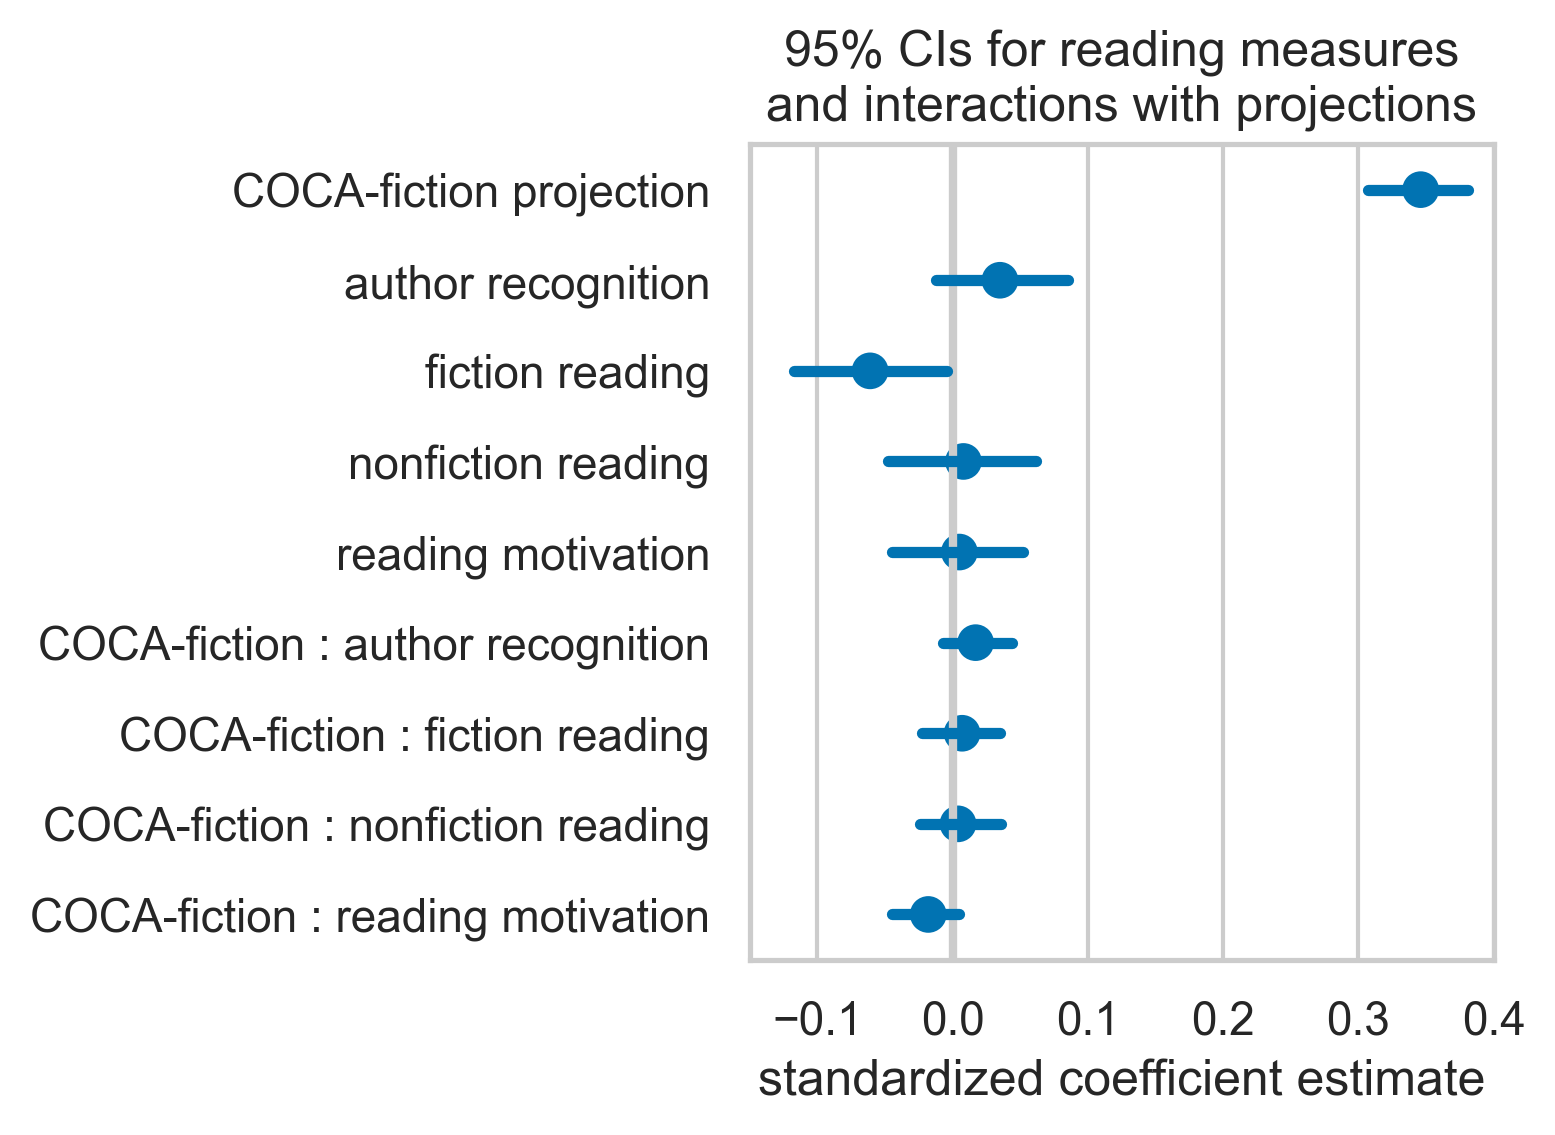

In [87]:
sns.set(palette='colorblind', style='whitegrid')
g, ax = plt.subplots(figsize=[3.2, 3.6])
ax.axvline(0, color='.8', linewidth=2)
sns.pointplot(data=trace_df, x='mean', y='index', join=False, ax=ax,
              color=sns.color_palette()[0])
hdi_df = trace_df.melt(id_vars=['index'], value_vars=['hdi_2.5%', 'hdi_97.5%'])
sns.pointplot(data=hdi_df, markers='', x='value', color=sns.color_palette()[0],
              y='index', ax=ax, join=False)
ax.set(xlim=[-.15, .4], ylabel='', xlabel='standardized coefficient estimate', xticks=[-.1, 0, .1, .2, .3, .4],
       title='95% CIs for reading measures\nand interactions with projections')
ax.set(yticklabels=[
    'COCA-fiction projection',
    'author recognition',
    'fiction reading',
    'nonfiction reading',
    'reading motivation',
    'COCA-fiction : author recognition',
    'COCA-fiction : fiction reading',
    'COCA-fiction : nonfiction reading',
    'COCA-fiction : reading motivation'
])
plt.savefig('figures/reading_measures_forest_new.pdf', bbox_inches='tight')

[INFO] finding looplift candidates


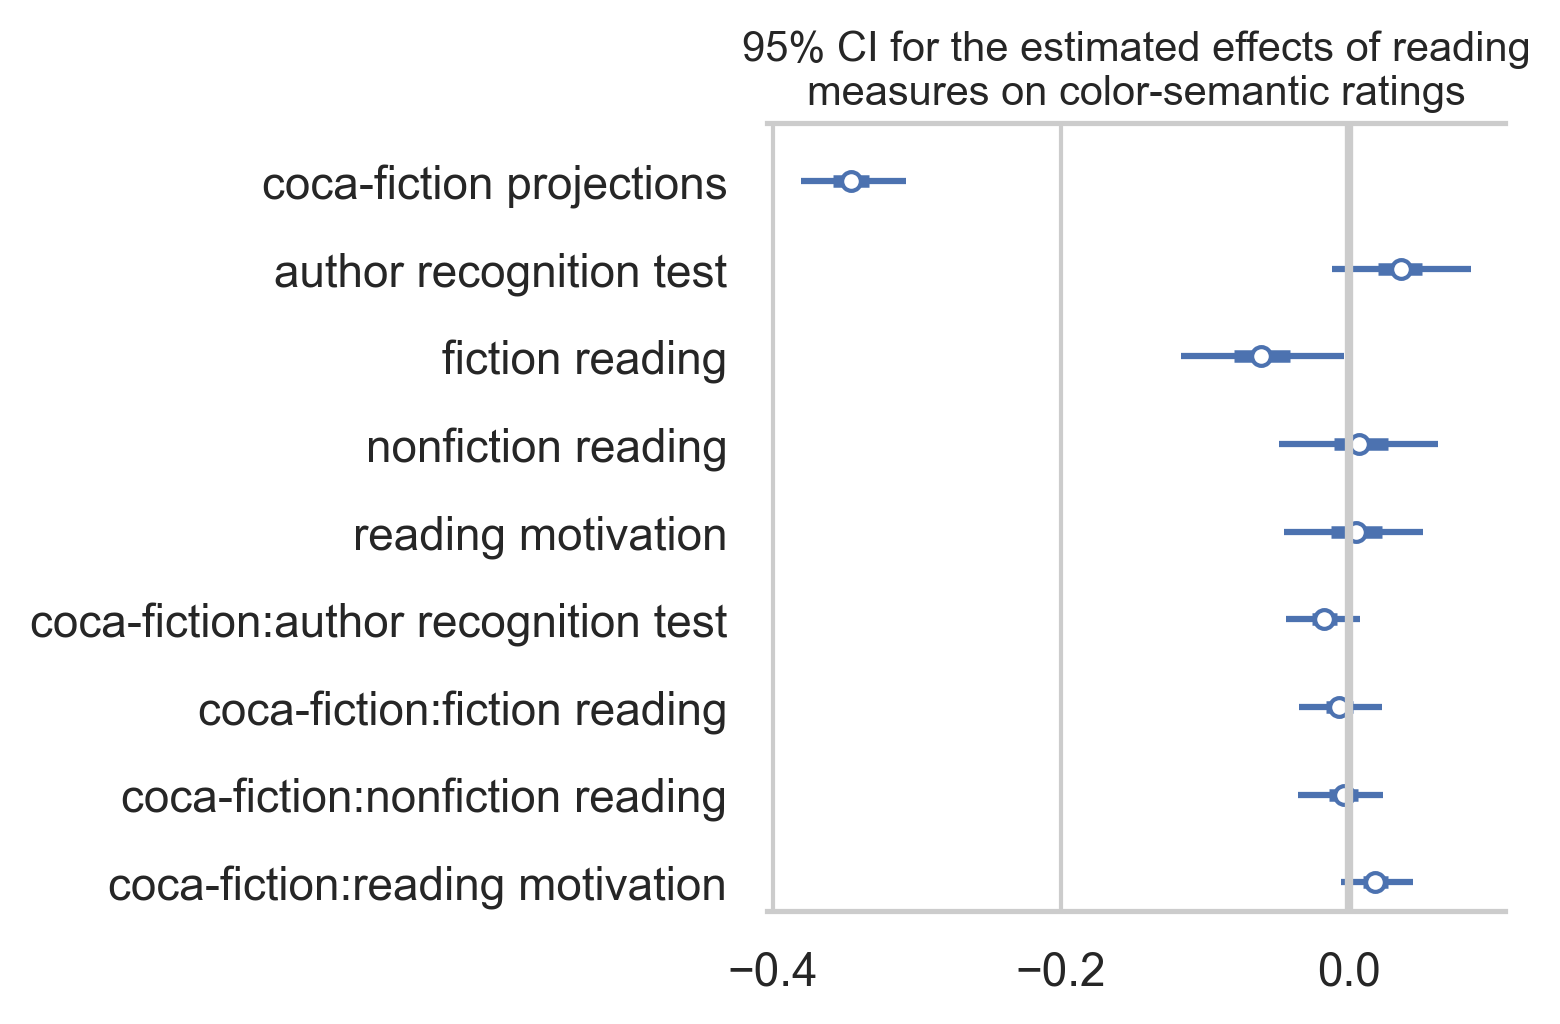

In [51]:
varnames = [
    #'Intercept',
    #'frequency_z',
    #'concreteness_z',
    'cosine_fic_z',
    'art_z',
    'fiction_z',
    'nonfiction_z',
    'reading_motivation_z',
    'cosine_fic_z:art_z',
    'cosine_fic_z:fiction_z',
    'cosine_fic_z:nonfiction_z',
    'cosine_fic_z:reading_motivation_z',
    #'swow_all_z',
]
g = az.plot_forest(r_all, combined=True, hdi_prob=.95,
                   figsize=[5, .6 + len(varnames) * .3],
                   var_names=varnames)
g[0].axvline(0, color='.8', linewidth=2);
g[0].set(yticklabels=reversed([
    'coca-fiction projections',
    'author recognition test',
    'fiction reading',
    'nonfiction reading',
    'reading motivation',
    'coca-fiction:author recognition test',
    'coca-fiction:fiction reading',
    'coca-fiction:nonfiction reading',
    'coca-fiction:reading motivation'
]))
g[0].set(title='95% CI for the estimated effects of reading\nmeasures on color-semantic ratings')
g[0].title.set_size(10)
plt.savefig('figures/reading_measures_forest.pdf', bbox_inches='tight')

In [44]:
display(pm.summary(r_all, var_names=varnames, hdi_prob=.95).round(2))

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
cosine_fic_z,-0.35,0.02,-0.38,-0.31,0.0,0.0,2590.0,2588.0,2589.0,1456.0,1.0
art_z,0.04,0.02,-0.01,0.08,0.0,0.0,1143.0,1056.0,1131.0,1457.0,1.0
fiction_z,-0.06,0.03,-0.12,-0.00,0.0,0.0,871.0,859.0,872.0,1129.0,1.0
nonfiction_z,0.01,0.03,-0.05,0.06,0.0,0.0,969.0,969.0,975.0,1077.0,1.0
reading_motivation_z,0.00,0.03,-0.04,0.05,0.0,0.0,1061.0,1061.0,1061.0,1333.0,1.0
cosine_fic_z:art_z,-0.02,0.01,-0.04,0.01,0.0,0.0,1923.0,1680.0,1921.0,1515.0,1.0
cosine_fic_z:fiction_z,-0.01,0.02,-0.04,0.02,0.0,0.0,1415.0,966.0,1419.0,1276.0,1.0
cosine_fic_z:nonfiction_z,-0.00,0.02,-0.04,0.02,0.0,0.0,1357.0,969.0,1366.0,1162.0,1.0
cosine_fic_z:reading_motivation_z,0.02,0.01,-0.00,0.04,0.0,0.0,1698.0,1561.0,1702.0,1457.0,1.0


## ART

In [22]:
# only 2nd replication data, look at ART*COCA-fiction interaction
m_art = bambi.Model(df_joint[df_joint['self_vs_other'] == 'self'].dropna())
r_art = m_art.fit(
    'rating_z ~ 1'
    + ' + frequency_z'
    + ' + concreteness_z'
    + ' + cosine_fic_z*art_z'
    + ' + swow_all_z',
    group_specific=[
        #'1 + frequency_z + concreteness_z + cosine_fic_z*art_z + swow_all_z + color + dimension|pp_id',
        '1 + frequency_z + concreteness_z + cosine_fic_z*art_z + swow_all_z|pp_id',
        '1|dimension',
        '1|color',
    ],
    init='advi+adapt_diag',
    n_init=50000,
    chains=2,
    draws=1000,
    tune=1000,
    target_accept=.9,
    return_inferencedata=False,
)

samples will be deprecated, please use draws instead
[WARNING] samples will be deprecated, please use draws instead
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
[INFO] Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...
[INFO] Initializing NUTS using advi+adapt_diag...
INFO (theano.gof.compilelock): Refreshing lock /Users/jvparidon/.theano/compiledir_Darwin-20.1.0-x86_64-i386-64bit-i386-3.7.9-64/lock_dir/lock
[INFO] Refreshing lock /Users/jvparidon/.theano/compiledir_Darwin-20.1.0-x86_64-i386-64bit-i386-3.7.9-64/lock_dir/lock


Finished [100%]: Average Loss = 20,668
[INFO] Finished [100%]: Average Loss = 20,668
INFO (theano.gof.compilelock): Refreshing lock /Users/jvparidon/.theano/compiledir_Darwin-20.1.0-x86_64-i386-64bit-i386-3.7.9-64/lock_dir/lock
[INFO] Refreshing lock /Users/jvparidon/.theano/compiledir_Darwin-20.1.0-x86_64-i386-64bit-i386-3.7.9-64/lock_dir/lock
Multiprocess sampling (2 chains in 4 jobs)
[INFO] Multiprocess sampling (2 chains in 4 jobs)
NUTS: [rating_z_sigma, 1|color_offset, 1|color_sigma, 1|dimension_offset, 1|dimension_sigma, swow_all_z|pp_id_offset, swow_all_z|pp_id_sigma, cosine_fic_z:art_z|pp_id_offset, cosine_fic_z:art_z|pp_id_sigma, art_z|pp_id_offset, art_z|pp_id_sigma, cosine_fic_z|pp_id_offset, cosine_fic_z|pp_id_sigma, concreteness_z|pp_id_offset, concreteness_z|pp_id_sigma, frequency_z|pp_id_offset, frequency_z|pp_id_sigma, 1|pp_id_offset, 1|pp_id_sigma, swow_all_z, cosine_fic_z:art_z, art_z, cosine_fic_z, concreteness_z, frequency_z, Intercept]
[INFO] NUTS: [rating_z_sigma,

Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 988 seconds.
[INFO] Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 988 seconds.
There were 57 divergences after tuning. Increase `target_accept` or reparameterize.
[ERROR] There were 57 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
[ERROR] There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.
[ERROR] The estimated number of effective samples is smaller than 200 for some parameters.


[INFO] finding looplift candidates


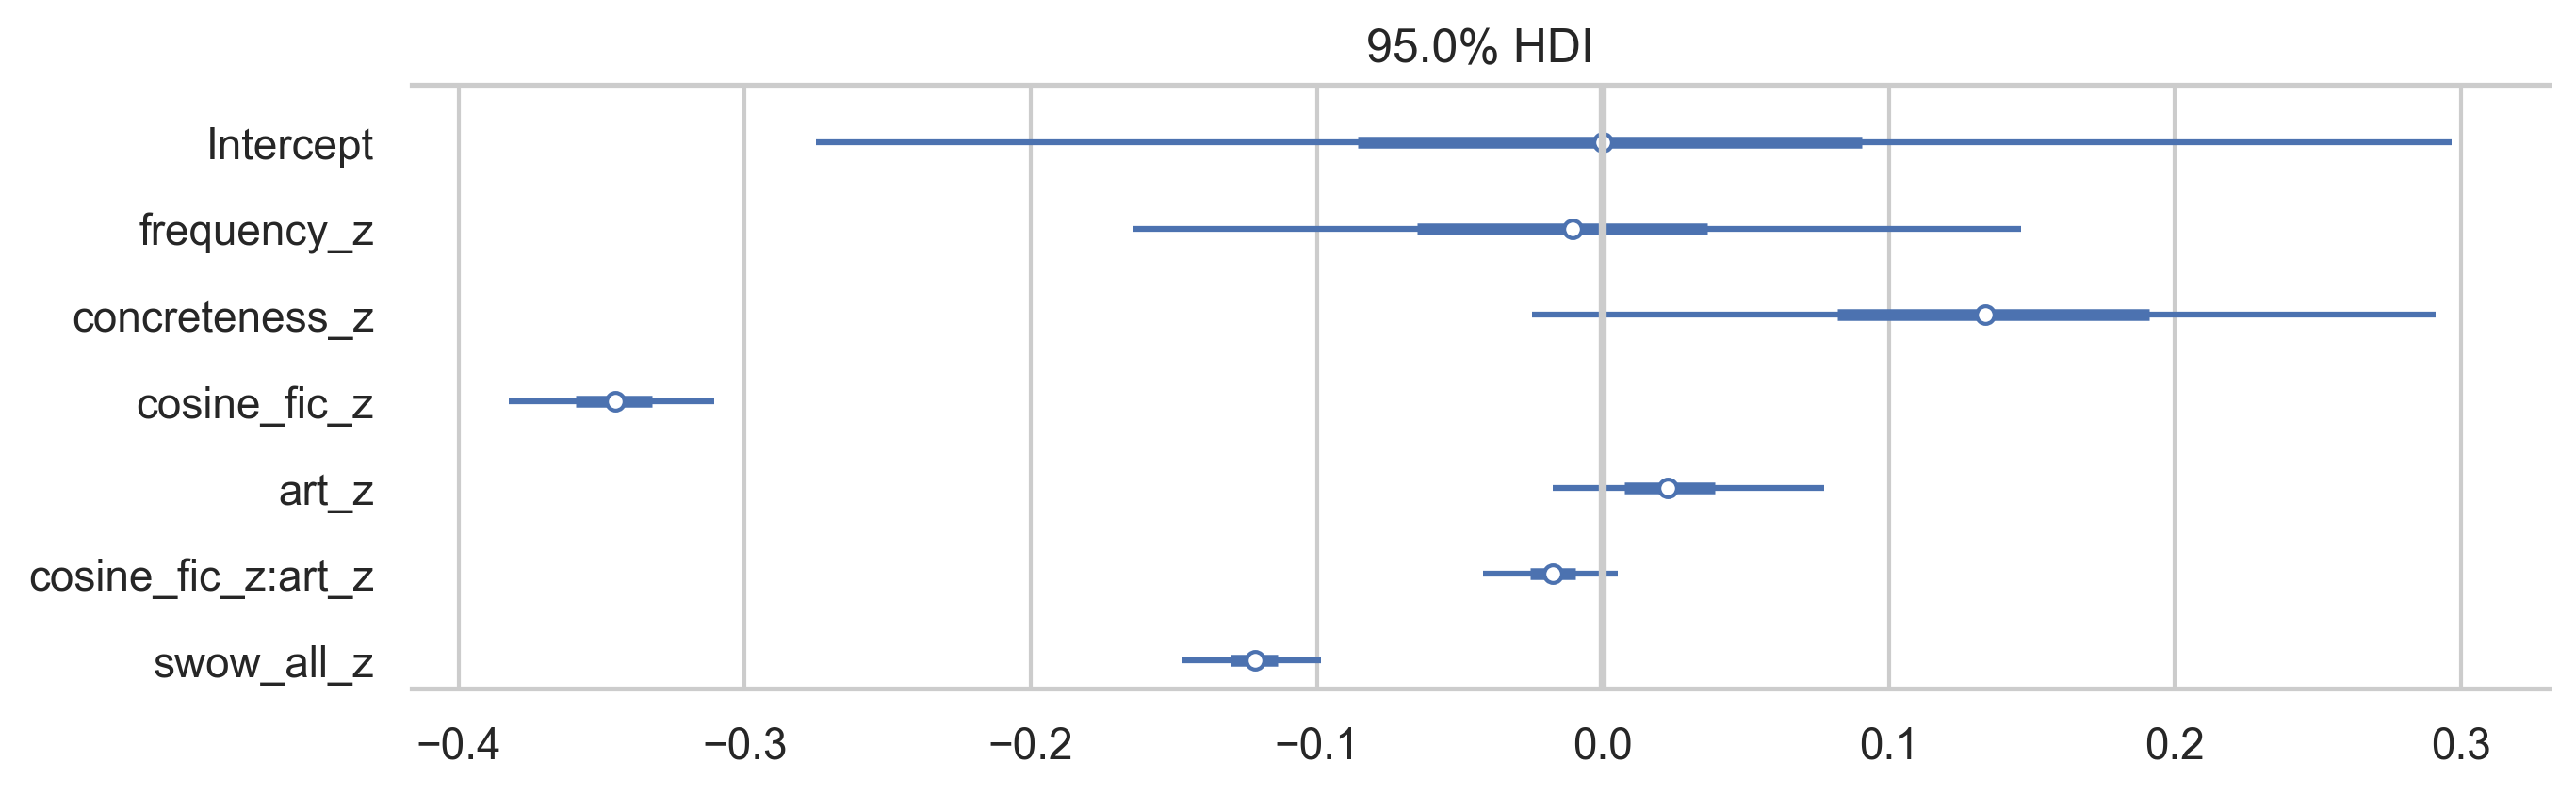

In [23]:
varnames = [
    'Intercept',
    'frequency_z',
    'concreteness_z',
    'cosine_fic_z',
    'art_z',
    'cosine_fic_z:art_z',
    'swow_all_z',
]
g = az.plot_forest(r_art, combined=True, hdi_prob=.95,
                   figsize=[9, .6 + len(varnames) * .3],
                   var_names=varnames)
g[0].axvline(0, color='.8', linewidth=2);

## Fiction

In [27]:
# only 2nd replication data, look at fiction*COCA-fiction interaction
m_fiction = bambi.Model(df_joint[df_joint['self_vs_other'] == 'self'].dropna())
r_fiction = m_fiction.fit(
    'rating_z ~ 1'
    + ' + frequency_z'
    + ' + concreteness_z'
    + ' + cosine_fic_z*fiction_z'
    + ' + swow_all_z',
    group_specific=[
        '1 + frequency_z + concreteness_z + cosine_fic_z*fiction_z + swow_all_z + color + dimension|pp_id',
        '1|dimension',
        '1|color',
    ],
    **params,
)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
[INFO] Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...
[INFO] Initializing NUTS using advi+adapt_diag...


Finished [100%]: Average Loss = 18,400
[INFO] Finished [100%]: Average Loss = 18,400
Multiprocess sampling (2 chains in 4 jobs)
[INFO] Multiprocess sampling (2 chains in 4 jobs)
NUTS: [rating_z_sigma, 1|color_offset, 1|color_sigma, 1|dimension_offset, 1|dimension_sigma, swow_all_z|pp_id_offset, swow_all_z|pp_id_sigma, cosine_fic_z:fiction_z|pp_id_offset, cosine_fic_z:fiction_z|pp_id_sigma, fiction_z|pp_id_offset, fiction_z|pp_id_sigma, cosine_fic_z|pp_id_offset, cosine_fic_z|pp_id_sigma, concreteness_z|pp_id_offset, concreteness_z|pp_id_sigma, frequency_z|pp_id_offset, frequency_z|pp_id_sigma, dimension[T.submissive-aggressive]|pp_id_offset, dimension[T.submissive-aggressive]|pp_id_sigma, dimension[T.soft-hard]|pp_id_offset, dimension[T.soft-hard]|pp_id_sigma, dimension[T.selfless-jealous]|pp_id_offset, dimension[T.selfless-jealous]|pp_id_sigma, dimension[T.ripe-unripe]|pp_id_offset, dimension[T.ripe-unripe]|pp_id_sigma, dimension[T.relaxed-tense]|pp_id_offset, dimension[T.relaxed-tens

Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 4358 seconds.
[INFO] Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 4358 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.
[ERROR] The estimated number of effective samples is smaller than 200 for some parameters.


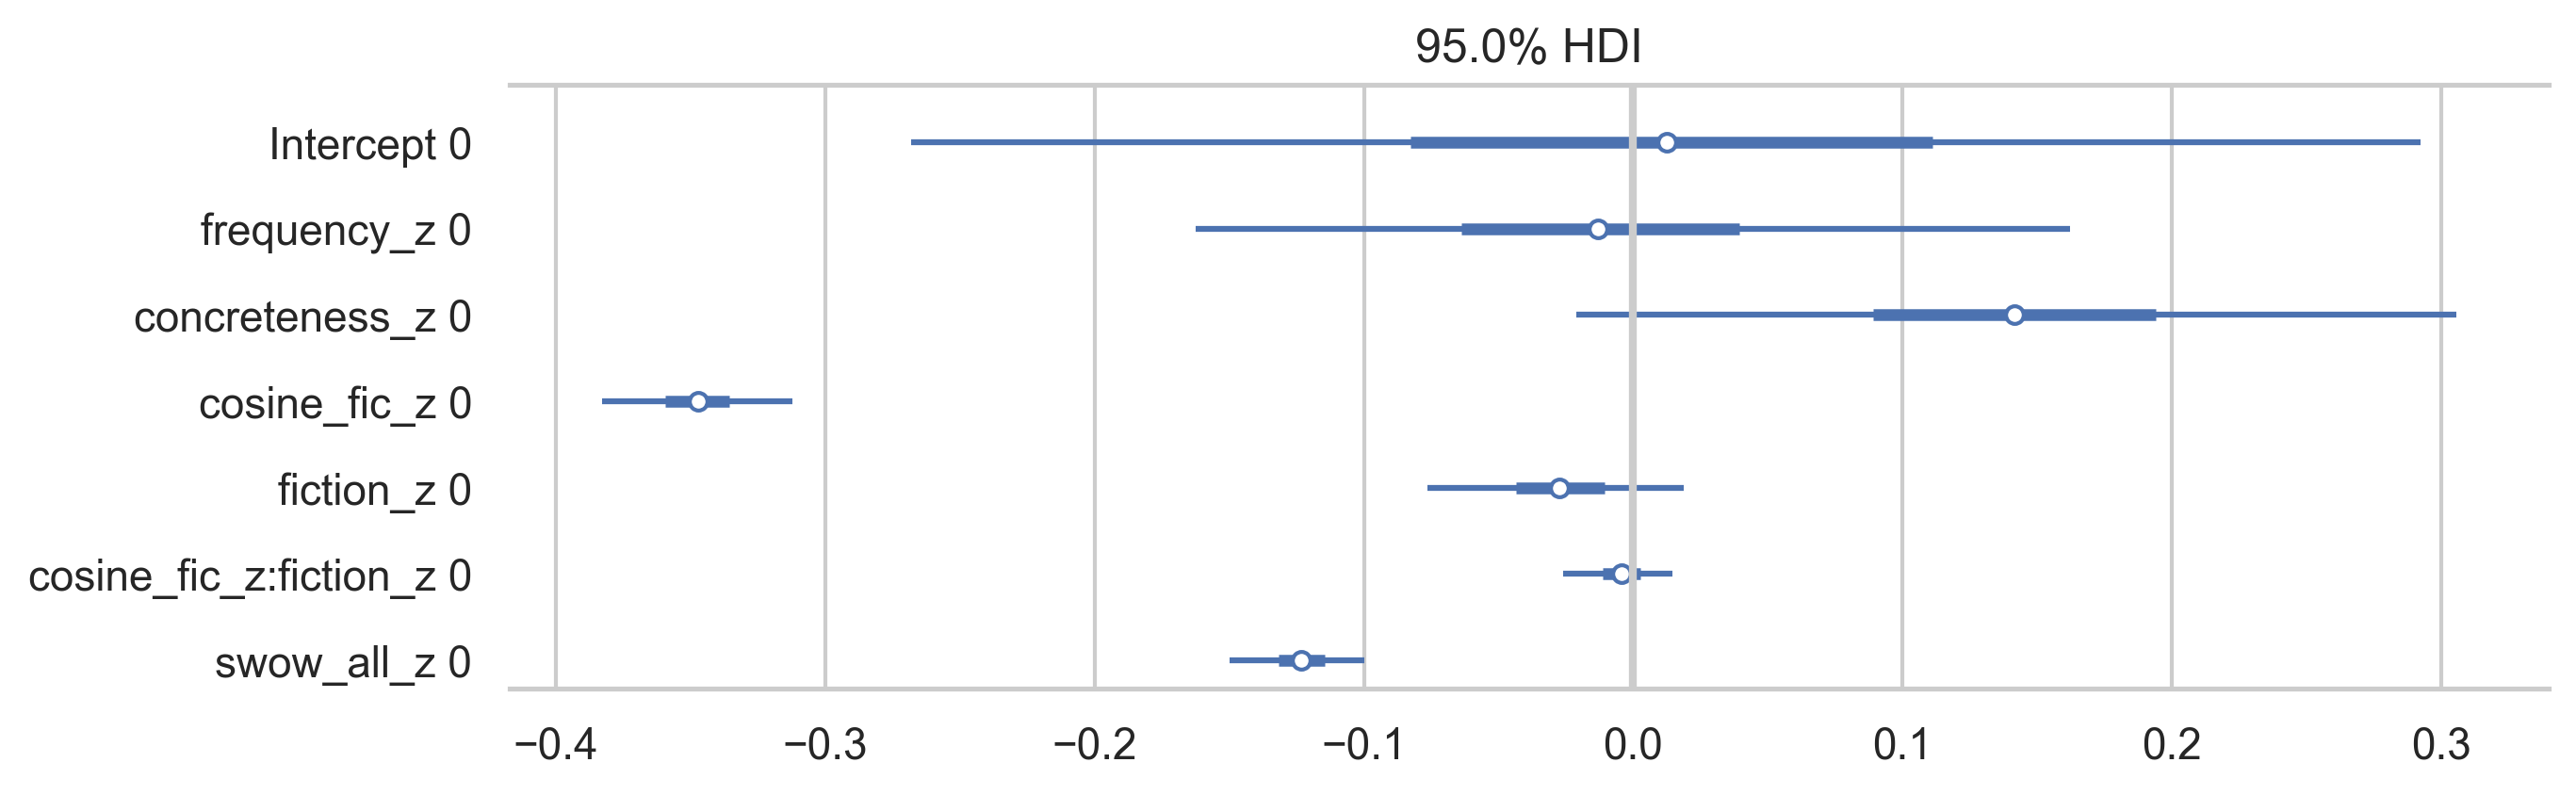

In [14]:
varnames = [
    'Intercept',
    'frequency_z',
    'concreteness_z',
    'cosine_fic_z',
    'fiction_z',
    'cosine_fic_z:fiction_z',
    'swow_all_z',
]
g = az.plot_forest(r_fiction, combined=True, hdi_prob=.95,
                   figsize=[9, .6 + len(varnames) * .3],
                   var_names=varnames)
g[0].axvline(0, color='.8', linewidth=2);

## Nonfiction

In [10]:
# only 2nd replication data, look at ART*COCA-fiction interaction
m_nonfiction = bambi.Model(df_joint[df_joint['self_vs_other'] == 'self'].dropna())
r_nonfiction = m_nonfiction.fit(
    'rating_z ~ 1'
    + ' + frequency_z'
    + ' + concreteness_z'
    + ' + cosine_fic_z*nonfiction_z'
    + ' + swow_all_z',
    random=[
        '1 + frequency_z + concreteness_z + cosine_fic_z*nonfiction_z + swow_all_z + color + dimension|pp_id',
        '1|dimension',
        '1|color',
    ],
    init='advi+adapt_diag',
    n_init=50000,
    chains=2,
    samples=1000,
    tune=1000,
    #target_accept=.9,
)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/bambi/models.py:572: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  pred_data = pred_data[:, None]  # Must be 2D later
Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...
INFO:pymc3:Initializing NUTS using advi+adapt_diag...


Finished [100%]: Average Loss = 18,401
INFO:pymc3.variational.inference:Finished [100%]: Average Loss = 18,401
Multiprocess sampling (3 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (3 chains in 4 jobs)
NUTS: [rating_z_sd, 1|color_offset, 1|color_sd, 1|dimension_offset, 1|dimension_sd, swow_all_z|pp_id_offset, swow_all_z|pp_id_sd, cosine_fic_z:nonfiction_z|pp_id_offset, cosine_fic_z:nonfiction_z|pp_id_sd, nonfiction_z|pp_id_offset, nonfiction_z|pp_id_sd, cosine_fic_z|pp_id_offset, cosine_fic_z|pp_id_sd, concreteness_z|pp_id_offset, concreteness_z|pp_id_sd, frequency_z|pp_id_offset, frequency_z|pp_id_sd, dimension[T.submissive-aggressive]|pp_id_offset, dimension[T.submissive-aggressive]|pp_id_sd, dimension[T.soft-hard]|pp_id_offset, dimension[T.soft-hard]|pp_id_sd, dimension[T.selfless-jealous]|pp_id_offset, dimension[T.selfless-jealous]|pp_id_sd, dimension[T.ripe-unripe]|pp_id_offset, dimension[T.ripe-unripe]|pp_id_sd, dimension[T.relaxed-tense]|pp_id_offset, dimension[T.relaxed-t

Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 2444 seconds.
INFO:pymc3:Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 2444 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


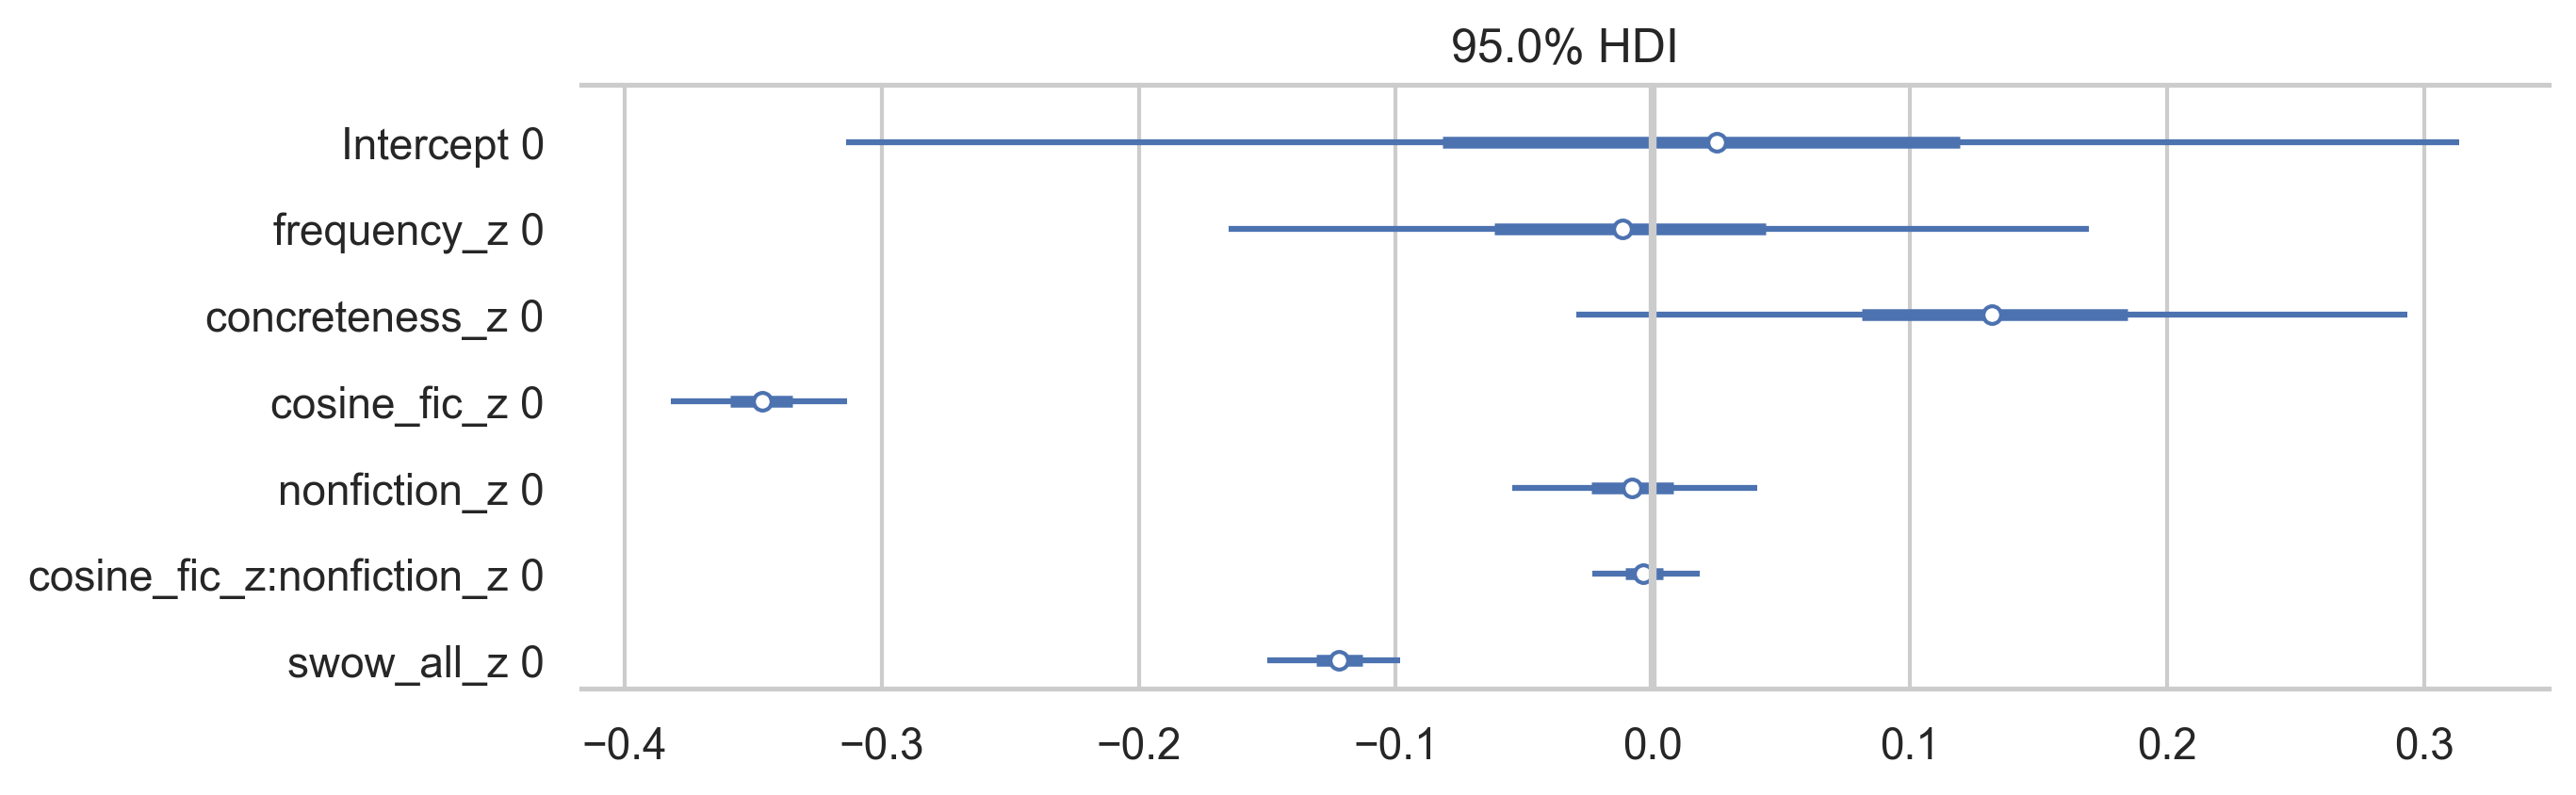

In [15]:
varnames = [
    'Intercept',
    'frequency_z',
    'concreteness_z',
    'cosine_fic_z',
    'nonfiction_z',
    'cosine_fic_z:nonfiction_z',
    'swow_all_z',
]
g = az.plot_forest(r_nonfiction, combined=True, hdi_prob=.95,
                   figsize=[9, .6 + len(varnames) * .3],
                   var_names=varnames)
g[0].axvline(0, color='.8', linewidth=2);

## Reading subscales
### Reading motivation

In [13]:
# only 2nd replication data, look at ART*COCA-fiction interaction
m_comp = bambi.Model(df_joint[df_joint['self_vs_other'] == 'self'].dropna())
r_comp = m_comp.fit(
    'rating_z ~ 1'
    + ' + frequency_z'
    + ' + concreteness_z'
    + ' + cosine_fic_z*reading_motivation_z'
    + ' + swow_all_z',
    random=[
        '1 + frequency_z + concreteness_z + cosine_fic_z*reading_motivation_z + swow_all_z|pp_id',
        '1|dimension',
        '1|color',
    ],
    init='advi+adapt_diag',
    n_init=50000,
    chains=2,
    samples=1000,
    tune=1000,
    #target_accept=.9,
)

The random argument has been deprecated, please use group_specific
[WARNING] The random argument has been deprecated, please use group_specific
samples will be deprecated, please use draws instead
[WARNING] samples will be deprecated, please use draws instead
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
[INFO] Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...
[INFO] Initializing NUTS using advi+adapt_diag...


Convergence achieved at 30800
[INFO] Convergence achieved at 30800
Interrupted at 30,799 [61%]: Average Loss = 25,606
[INFO] Interrupted at 30,799 [61%]: Average Loss = 25,606
Multiprocess sampling (3 chains in 4 jobs)
[INFO] Multiprocess sampling (3 chains in 4 jobs)
NUTS: [rating_z_sigma, 1|color_offset, 1|color_sigma, 1|dimension_offset, 1|dimension_sigma, swow_all_z|pp_id_offset, swow_all_z|pp_id_sigma, cosine_fic_z:reading_motivation_z|pp_id_offset, cosine_fic_z:reading_motivation_z|pp_id_sigma, reading_motivation_z|pp_id_offset, reading_motivation_z|pp_id_sigma, cosine_fic_z|pp_id_offset, cosine_fic_z|pp_id_sigma, concreteness_z|pp_id_offset, concreteness_z|pp_id_sigma, frequency_z|pp_id_offset, frequency_z|pp_id_sigma, 1|pp_id_offset, 1|pp_id_sigma, swow_all_z, cosine_fic_z:reading_motivation_z, reading_motivation_z, cosine_fic_z, concreteness_z, frequency_z, Intercept]
[INFO] NUTS: [rating_z_sigma, 1|color_offset, 1|color_sigma, 1|dimension_offset, 1|dimension_sigma, swow_all_z

Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 580 seconds.
[INFO] Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 580 seconds.
There were 10 divergences after tuning. Increase `target_accept` or reparameterize.
[ERROR] There were 10 divergences after tuning. Increase `target_accept` or reparameterize.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
[ERROR] There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
[ERROR] There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.
[INFO] The number of effective samples is smaller than 25% for some parameters.


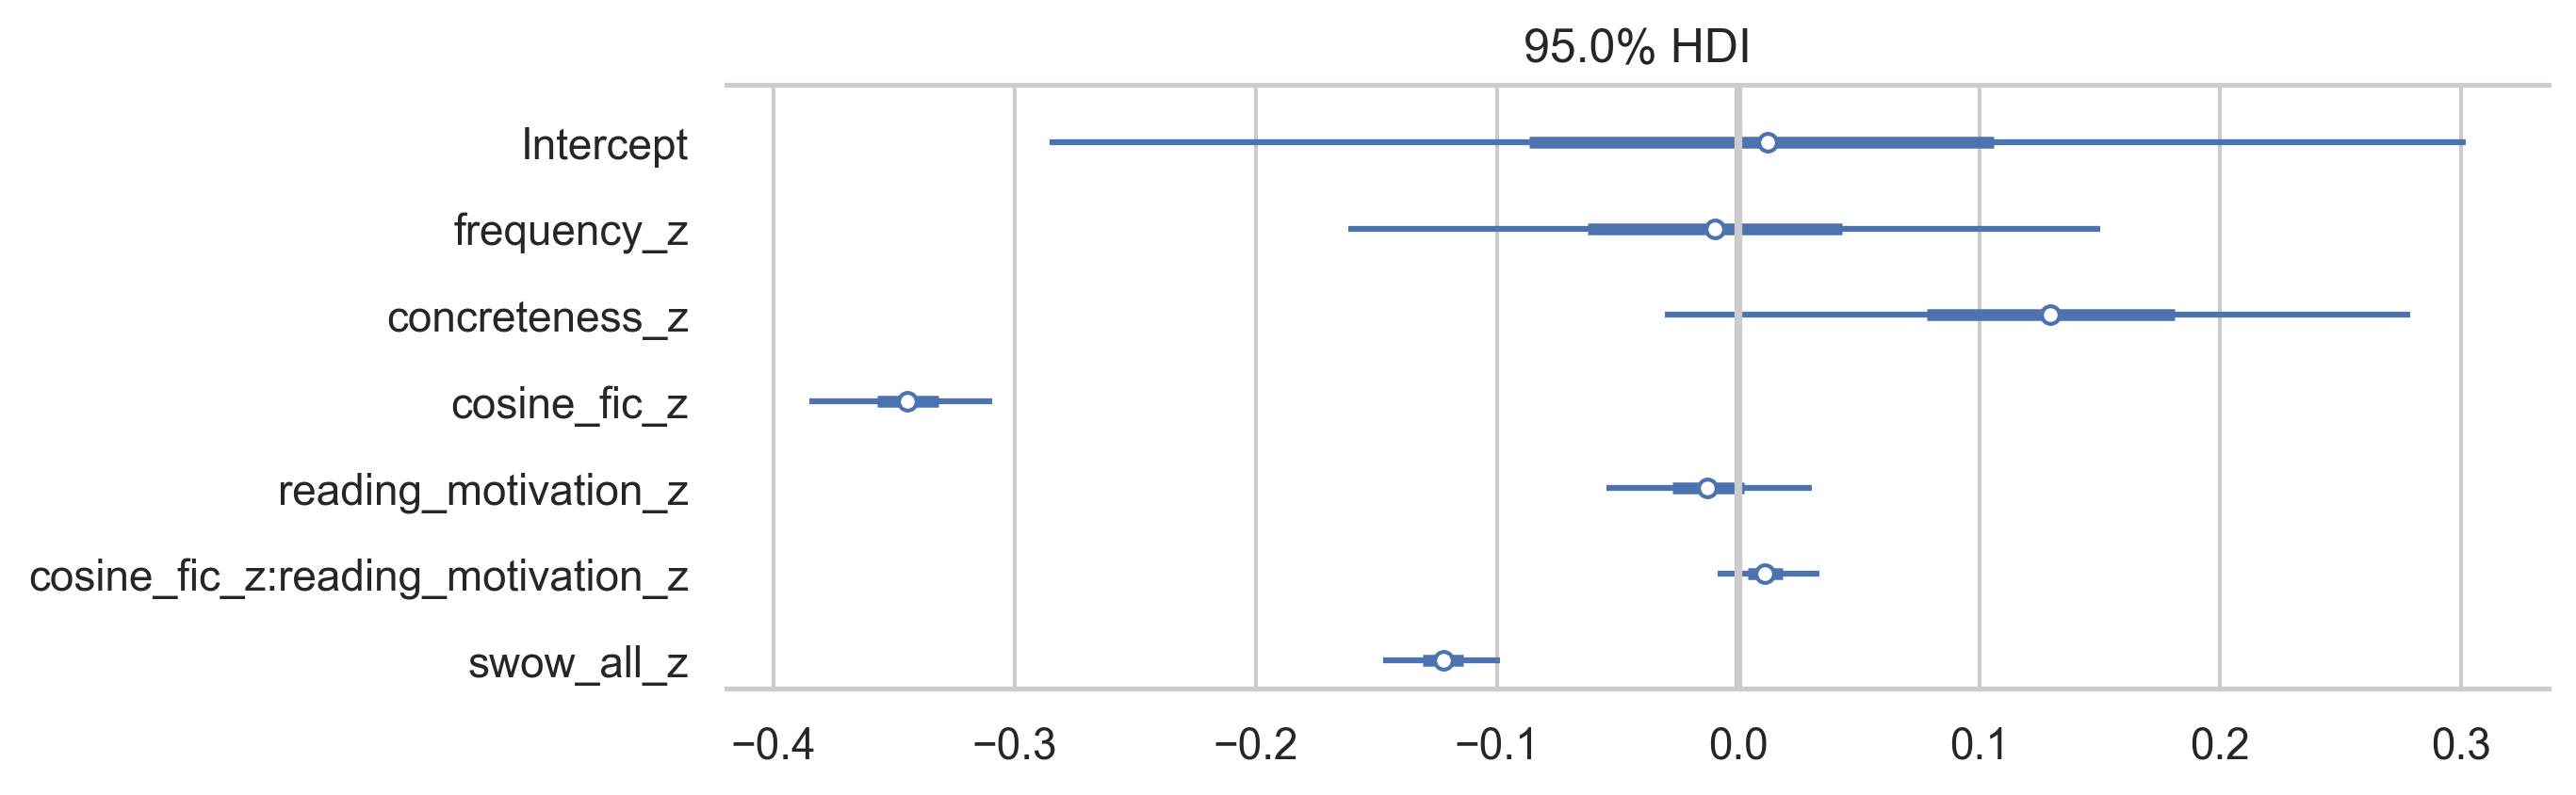

In [14]:
varnames = [
    'Intercept',
    'frequency_z',
    'concreteness_z',
    'cosine_fic_z',
    'reading_motivation_z',
    'cosine_fic_z:reading_motivation_z',
    'swow_all_z',
]
g = az.plot_forest(r_comp, combined=True, hdi_prob=.95,
                   figsize=[9, .6 + len(varnames) * .3],
                   var_names=varnames)
g[0].axvline(0, color='.8', linewidth=2);

### Reading as part of self

In [4]:
# only 2nd replication data, look at ART*COCA-fiction interaction
m_self = bambi.Model(df_joint[df_joint['self_vs_other'] == 'self'].dropna())
r_self = m_self.fit(
    'rating_z ~ 1'
    + ' + frequency_z'
    + ' + concreteness_z'
    + ' + cosine_fic_z*reading_part_of_self_z'
    + ' + swow_all_z',
    group_specific=[
        '1 + frequency_z + concreteness_z + cosine_fic_z*reading_part_of_self_z + swow_all_z|pp_id',
        '1|dimension',
        '1|color',
    ],
    init='advi+adapt_diag',
    n_init=50000,
    chains=2,
    samples=1000,
    tune=1000,
    #target_accept=.9,
)

The random argument has been deprecated, please use group_specific
[WARNING] The random argument has been deprecated, please use group_specific
samples will be deprecated, please use draws instead
[WARNING] samples will be deprecated, please use draws instead
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
[INFO] Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...
[INFO] Initializing NUTS using advi+adapt_diag...


Convergence achieved at 32100
[INFO] Convergence achieved at 32100
Interrupted at 32,099 [64%]: Average Loss = 25,062
[INFO] Interrupted at 32,099 [64%]: Average Loss = 25,062
Multiprocess sampling (3 chains in 4 jobs)
[INFO] Multiprocess sampling (3 chains in 4 jobs)
NUTS: [rating_z_sigma, 1|color_offset, 1|color_sigma, 1|dimension_offset, 1|dimension_sigma, swow_all_z|pp_id_offset, swow_all_z|pp_id_sigma, cosine_fic_z:reading_part_of_self_z|pp_id_offset, cosine_fic_z:reading_part_of_self_z|pp_id_sigma, reading_part_of_self_z|pp_id_offset, reading_part_of_self_z|pp_id_sigma, cosine_fic_z|pp_id_offset, cosine_fic_z|pp_id_sigma, concreteness_z|pp_id_offset, concreteness_z|pp_id_sigma, frequency_z|pp_id_offset, frequency_z|pp_id_sigma, 1|pp_id_offset, 1|pp_id_sigma, swow_all_z, cosine_fic_z:reading_part_of_self_z, reading_part_of_self_z, cosine_fic_z, concreteness_z, frequency_z, Intercept]
[INFO] NUTS: [rating_z_sigma, 1|color_offset, 1|color_sigma, 1|dimension_offset, 1|dimension_sigma

Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 570 seconds.
[INFO] Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 570 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
[ERROR] There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
[ERROR] There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 13 divergences after tuning. Increase `target_accept` or reparameterize.
[ERROR] There were 13 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.
[INFO] The number of effective samples is smaller than 25% for some parameters.


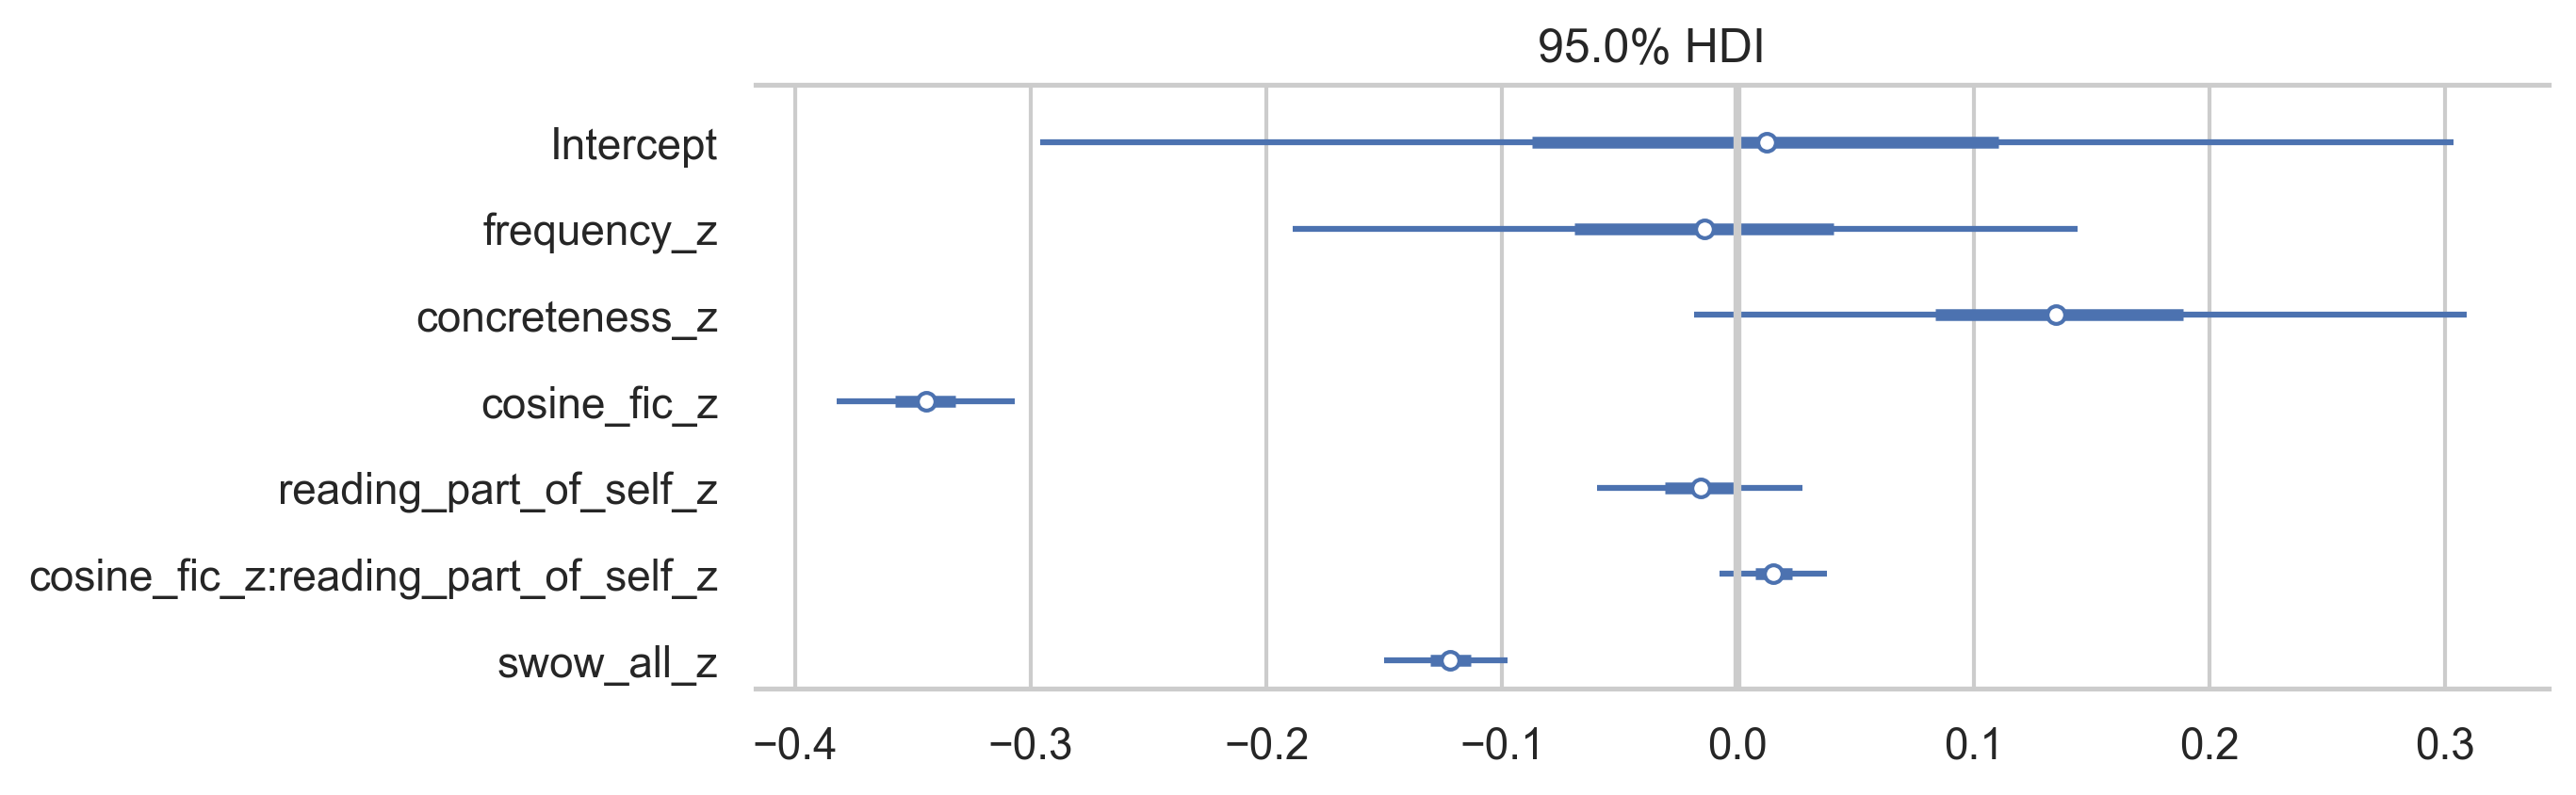

In [12]:
varnames = [
    'Intercept',
    'frequency_z',
    'concreteness_z',
    'cosine_fic_z',
    'reading_part_of_self_z',
    'cosine_fic_z:reading_part_of_self_z',
    'swow_all_z',
]
g = az.plot_forest(r_self, combined=True, hdi_prob=.95,
                   figsize=[9, .6 + len(varnames) * .3],
                   var_names=varnames)
g[0].axvline(0, color='.8', linewidth=2);

### Reading efficacy

In [5]:
# only 2nd replication data, look at ART*COCA-fiction interaction
m_eff = bambi.Model(df_joint[df_joint['self_vs_other'] == 'self'].dropna())
r_eff = m_eff.fit(
    'rating_z ~ 1'
    + ' + frequency_z'
    + ' + concreteness_z'
    + ' + cosine_fic_z*reading_efficacy_z'
    + ' + swow_all_z',
    group_specific=[
        '1 + frequency_z + concreteness_z + cosine_fic_z*reading_efficacy_z + swow_all_z|pp_id',
        '1|dimension',
        '1|color',
    ],
    init='advi+adapt_diag',
    n_init=50000,
    chains=2,
    samples=1000,
    tune=1000,
    #target_accept=.9,
)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
[INFO] Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...
[INFO] Initializing NUTS using advi+adapt_diag...


Convergence achieved at 32400
[INFO] Convergence achieved at 32400
Interrupted at 32,399 [64%]: Average Loss = 25,163
[INFO] Interrupted at 32,399 [64%]: Average Loss = 25,163
Multiprocess sampling (3 chains in 4 jobs)
[INFO] Multiprocess sampling (3 chains in 4 jobs)
NUTS: [rating_z_sigma, 1|color_offset, 1|color_sigma, 1|dimension_offset, 1|dimension_sigma, swow_all_z|pp_id_offset, swow_all_z|pp_id_sigma, cosine_fic_z:reading_efficacy_z|pp_id_offset, cosine_fic_z:reading_efficacy_z|pp_id_sigma, reading_efficacy_z|pp_id_offset, reading_efficacy_z|pp_id_sigma, cosine_fic_z|pp_id_offset, cosine_fic_z|pp_id_sigma, concreteness_z|pp_id_offset, concreteness_z|pp_id_sigma, frequency_z|pp_id_offset, frequency_z|pp_id_sigma, 1|pp_id_offset, 1|pp_id_sigma, swow_all_z, cosine_fic_z:reading_efficacy_z, reading_efficacy_z, cosine_fic_z, concreteness_z, frequency_z, Intercept]
[INFO] NUTS: [rating_z_sigma, 1|color_offset, 1|color_sigma, 1|dimension_offset, 1|dimension_sigma, swow_all_z|pp_id_offse

Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 769 seconds.
[INFO] Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 769 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
[ERROR] There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
[ERROR] There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
[ERROR] There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.
[ERROR] The estimated number of effective samples is smaller than 200 for some parameters.


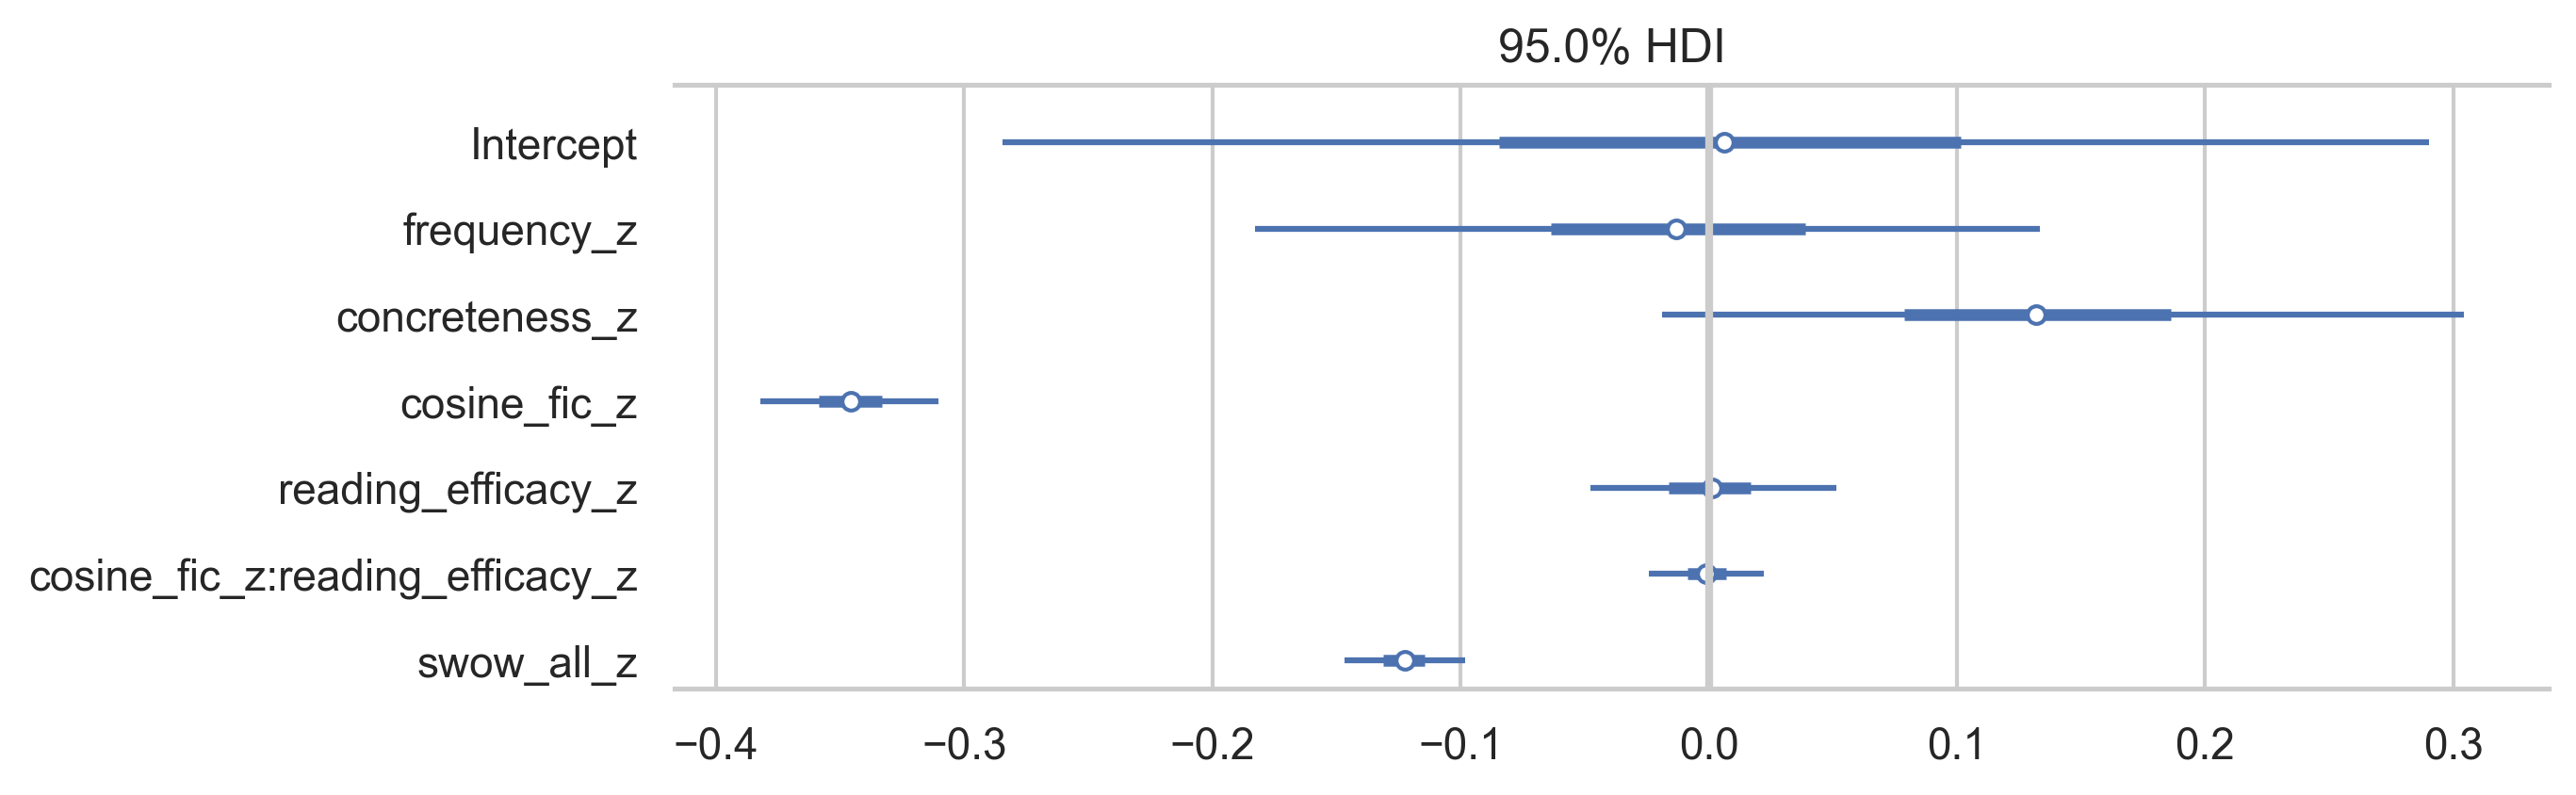

In [9]:
varnames = [
    'Intercept',
    'frequency_z',
    'concreteness_z',
    'cosine_fic_z',
    'reading_efficacy_z',
    'cosine_fic_z:reading_efficacy_z',
    'swow_all_z',
]
g = az.plot_forest(r_eff, combined=True, hdi_prob=.95,
                   figsize=[9, .6 + len(varnames) * .3],
                   var_names=varnames)
g[0].axvline(0, color='.8', linewidth=2);

### Reading for recognition

In [6]:
# only 2nd replication data, look at ART*COCA-fiction interaction
m_recog = bambi.Model(df_joint[df_joint['self_vs_other'] == 'self'].dropna())
r_recog = m_recog.fit(
    'rating_z ~ 1'
    + ' + frequency_z'
    + ' + concreteness_z'
    + ' + cosine_fic_z*reading_recognition_z'
    + ' + swow_all_z',
    group_specific=[
        '1 + frequency_z + concreteness_z + cosine_fic_z*reading_recognition_z + swow_all_z|pp_id',
        '1|dimension',
        '1|color',
    ],
    init='advi+adapt_diag',
    n_init=50000,
    chains=2,
    samples=1000,
    tune=1000,
    #target_accept=.9,
)

The random argument has been deprecated, please use group_specific
[WARNING] The random argument has been deprecated, please use group_specific
samples will be deprecated, please use draws instead
[WARNING] samples will be deprecated, please use draws instead
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
[INFO] Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...
[INFO] Initializing NUTS using advi+adapt_diag...


Convergence achieved at 34600
[INFO] Convergence achieved at 34600
Interrupted at 34,599 [69%]: Average Loss = 24,027
[INFO] Interrupted at 34,599 [69%]: Average Loss = 24,027
Multiprocess sampling (3 chains in 4 jobs)
[INFO] Multiprocess sampling (3 chains in 4 jobs)
NUTS: [rating_z_sigma, 1|color_offset, 1|color_sigma, 1|dimension_offset, 1|dimension_sigma, swow_all_z|pp_id_offset, swow_all_z|pp_id_sigma, cosine_fic_z:reading_recognition_z|pp_id_offset, cosine_fic_z:reading_recognition_z|pp_id_sigma, reading_recognition_z|pp_id_offset, reading_recognition_z|pp_id_sigma, cosine_fic_z|pp_id_offset, cosine_fic_z|pp_id_sigma, concreteness_z|pp_id_offset, concreteness_z|pp_id_sigma, frequency_z|pp_id_offset, frequency_z|pp_id_sigma, 1|pp_id_offset, 1|pp_id_sigma, swow_all_z, cosine_fic_z:reading_recognition_z, reading_recognition_z, cosine_fic_z, concreteness_z, frequency_z, Intercept]
[INFO] NUTS: [rating_z_sigma, 1|color_offset, 1|color_sigma, 1|dimension_offset, 1|dimension_sigma, swow

Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 745 seconds.
[INFO] Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 745 seconds.
There were 61 divergences after tuning. Increase `target_accept` or reparameterize.
[ERROR] There were 61 divergences after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
[ERROR] There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.
[ERROR] The estimated number of effective samples is smaller than 200 for some parameters.


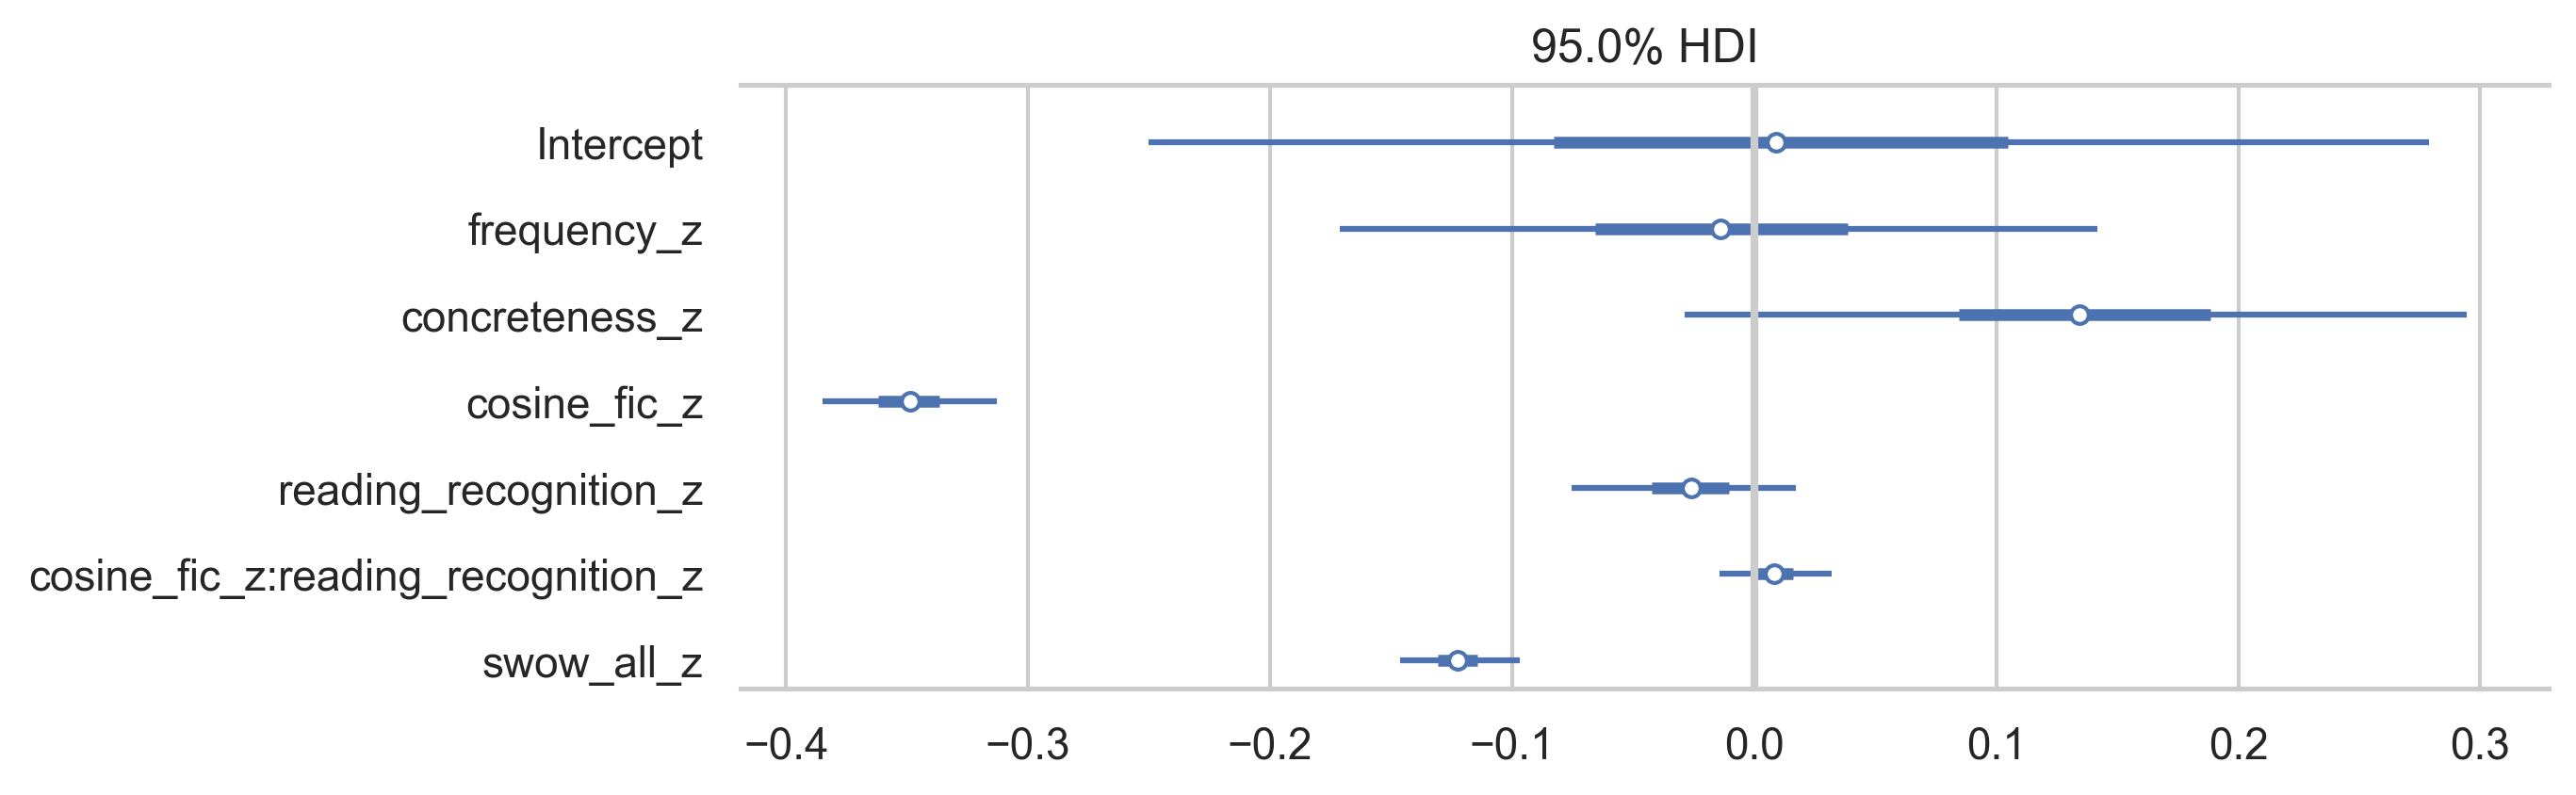

In [10]:
varnames = [
    'Intercept',
    'frequency_z',
    'concreteness_z',
    'cosine_fic_z',
    'reading_recognition_z',
    'cosine_fic_z:reading_recognition_z',
    'swow_all_z',
]
g = az.plot_forest(r_recog, combined=True, hdi_prob=.95,
                   figsize=[9, .6 + len(varnames) * .3],
                   var_names=varnames)
g[0].axvline(0, color='.8', linewidth=2);

### Reading to do well in other realms

In [7]:
# only 2nd replication data, look at ART*COCA-fiction interaction
m_realms = bambi.Model(df_joint[df_joint['self_vs_other'] == 'self'].dropna())
r_realms = m_realms.fit(
    'rating_z ~ 1'
    + ' + frequency_z'
    + ' + concreteness_z'
    + ' + cosine_fic_z*reading_other_realms_z'
    + ' + swow_all_z',
    group_specific=[
        '1 + frequency_z + concreteness_z + cosine_fic_z*reading_other_realms_z + swow_all_z|pp_id',
        '1|dimension',
        '1|color',
    ],
    init='advi+adapt_diag',
    n_init=50000,
    chains=2,
    samples=1000,
    tune=1000,
    #target_accept=.9,
)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
[INFO] Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...
[INFO] Initializing NUTS using advi+adapt_diag...


Convergence achieved at 38700
[INFO] Convergence achieved at 38700
Interrupted at 38,699 [77%]: Average Loss = 23,642
[INFO] Interrupted at 38,699 [77%]: Average Loss = 23,642
Multiprocess sampling (3 chains in 4 jobs)
[INFO] Multiprocess sampling (3 chains in 4 jobs)
NUTS: [rating_z_sigma, 1|color_offset, 1|color_sigma, 1|dimension_offset, 1|dimension_sigma, swow_all_z|pp_id_offset, swow_all_z|pp_id_sigma, cosine_fic_z:reading_other_realms_z|pp_id_offset, cosine_fic_z:reading_other_realms_z|pp_id_sigma, reading_other_realms_z|pp_id_offset, reading_other_realms_z|pp_id_sigma, cosine_fic_z|pp_id_offset, cosine_fic_z|pp_id_sigma, concreteness_z|pp_id_offset, concreteness_z|pp_id_sigma, frequency_z|pp_id_offset, frequency_z|pp_id_sigma, 1|pp_id_offset, 1|pp_id_sigma, swow_all_z, cosine_fic_z:reading_other_realms_z, reading_other_realms_z, cosine_fic_z, concreteness_z, frequency_z, Intercept]
[INFO] NUTS: [rating_z_sigma, 1|color_offset, 1|color_sigma, 1|dimension_offset, 1|dimension_sigma

Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 676 seconds.
[INFO] Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 676 seconds.
There were 18 divergences after tuning. Increase `target_accept` or reparameterize.
[ERROR] There were 18 divergences after tuning. Increase `target_accept` or reparameterize.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
[ERROR] There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.
[WARNING] The number of effective samples is smaller than 10% for some parameters.


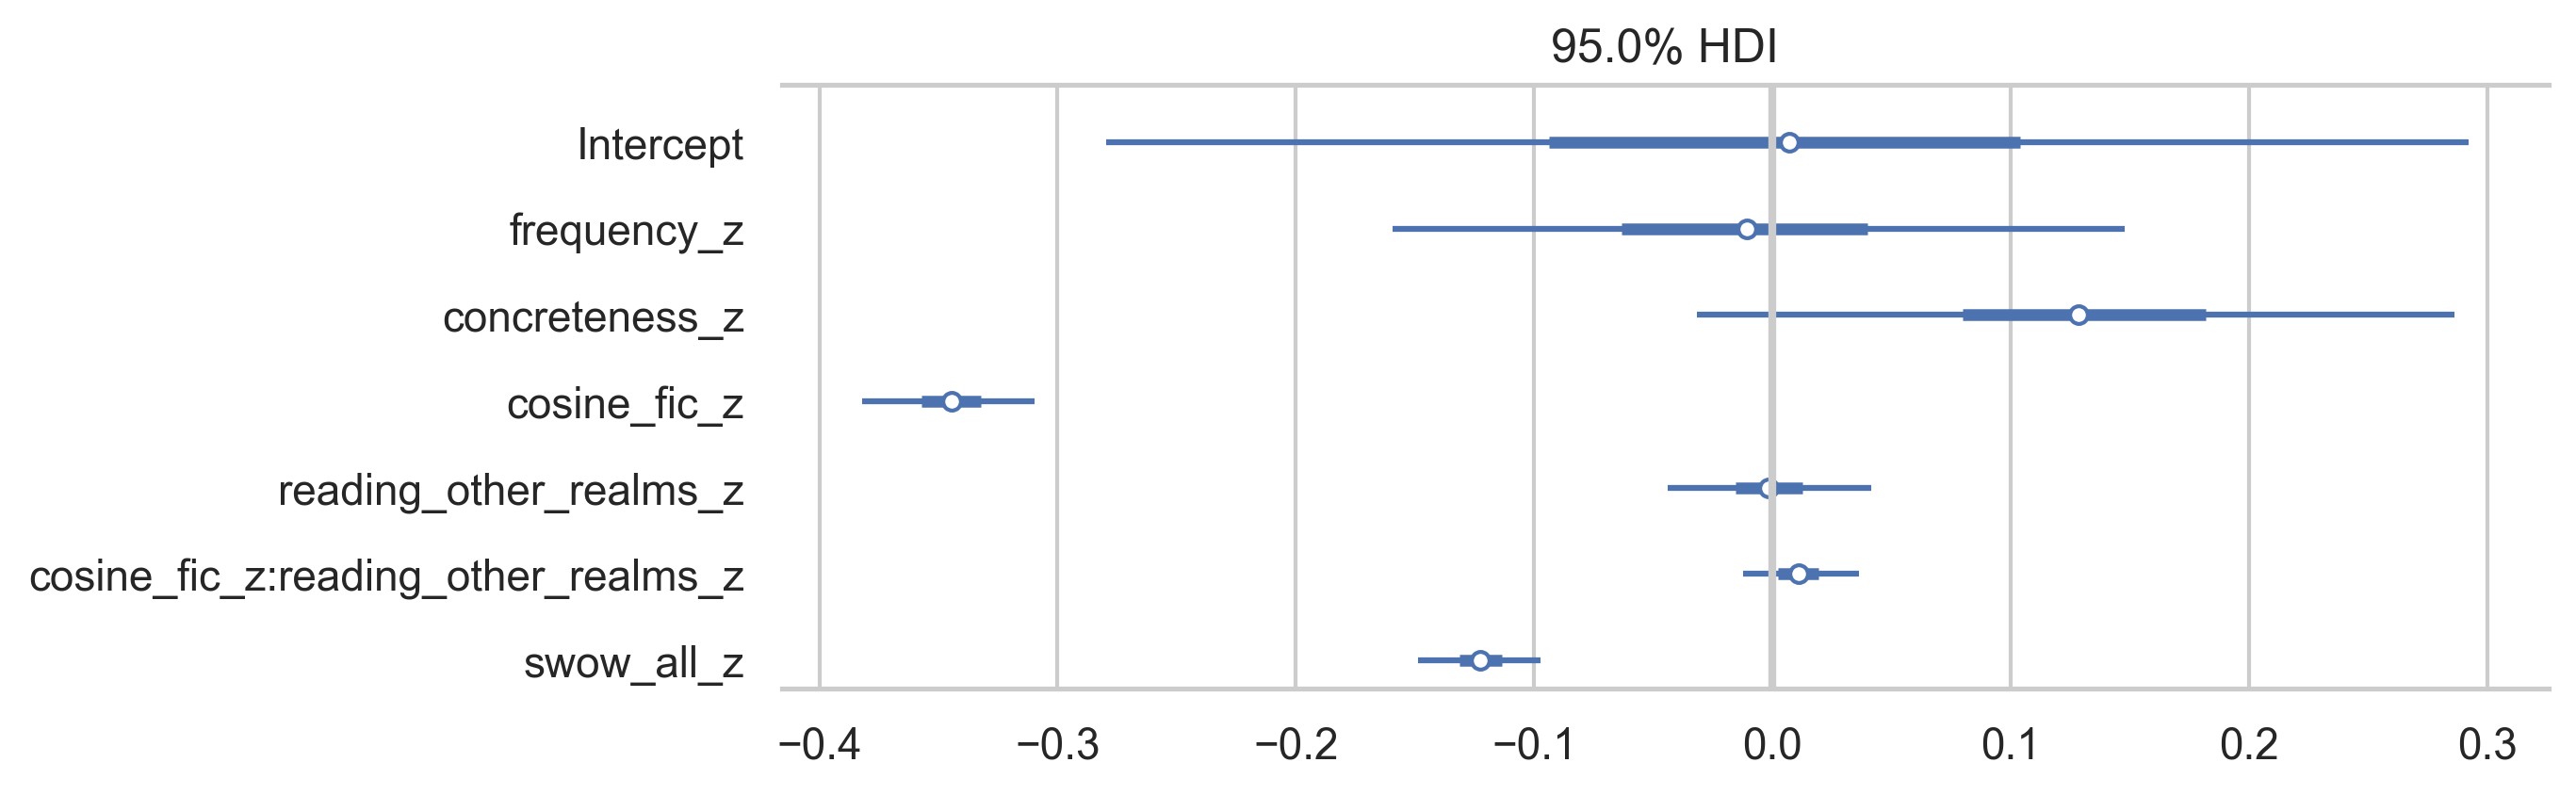

In [11]:
varnames = [
    'Intercept',
    'frequency_z',
    'concreteness_z',
    'cosine_fic_z',
    'reading_other_realms_z',
    'cosine_fic_z:reading_other_realms_z',
    'swow_all_z',
]
g = az.plot_forest(r_realms, combined=True, hdi_prob=.95,
                   figsize=[9, .6 + len(varnames) * .3],
                   var_names=varnames)
g[0].axvline(0, color='.8', linewidth=2);

None of the reading measures appear to have a meaningful effect on the ratings, nor do they interact with the semantic projection model trained on the COCA-fiction corpus.

There are (at least) two possible explanations for why these measures don't appear to have an effect:
1. Reading (and reading fiction specifically) does nothing to shape semantic knowledge (this seems unlikely, although for color associations simply experiencing the visual world certainly plays a big role as well).
2. Our participants are actually much more similar in fiction exposure than their scores suggest, because we are all exposed to a shared media environment (TV, Netflix, social media, etc.). Furthermore there is a baseline level of exposure to _written fiction_ that most undergraduate students can be expected to have (through completing K-12 education, etc.) which is sufficient for them to already be strongly semantically aligned. Further within-group differences in reading exposure then don't have much of an effect (i.e. there is some sort of ceiling effect happening).

# Convert notebook to html

In [15]:
convert_notebook('coca_icc_and_reading')

Jupyter notebook `coca_icc_and_reading` converted successfully.